<a href="https://colab.research.google.com/github/JungleKiosk/sonneblume/blob/main/sonneblume.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import data

In [ ]:
import pandas as pd
import geopandas as gpd

# Caricamento dati dal file GeoPackage
df = gpd.read_file('/content/drive/MyDrive/data/resa_girasole_2022.gpkg')

# Visione del dataframe
1. modificare la data (lista mesi in inglese) e separare in due col data e ora
2. cambiare decimale (lon & lat => , -> .)
3. dove e quanti NaN?


In [ ]:
df

Data/Ora  Longitudin  Latitudine  RESAKG  VELOCITA     AREA  \
0     5 set 2022, 10:08:09  11,9758245  44,8474908  1870.0      4.80  140.000   
1     5 set 2022, 10:08:24  11,9758157  44,8476751  1270.0      4.83  140.875   
2     5 set 2022, 10:08:40  11,9758154  44,8478795  1420.0      4.78  139.417   
3     5 set 2022, 10:08:55  11,9758209  44,8480593  2010.0      4.85  141.458   
4     5 set 2022, 10:09:10  11,9758201  44,8482443  1320.0      4.80  140.000   
...                    ...         ...         ...     ...       ...      ...   
1957  3 set 2022, 20:13:03  11,9757431  44,8480422  2260.0      4.77  139.125   
1958  3 set 2022, 20:13:19  11,9757395  44,8482399  2460.0      4.78  139.417   
1959  3 set 2022, 20:13:34  11,9757408  44,8484282  2330.0      4.78  139.417   
1960  3 set 2022, 20:13:49  11,9757414   44,848618  1950.0      4.99  145.542   
1961  3 set 2022, 20:14:05  11,9757344  44,8488297  1810.0      5.44  158.667   

      UMIDITA                         geometry  
0         NaN  POINT (1333142.685 5597543.903)  
1         NaN  POINT (1333141.706 5597572.841)  
2         NaN  POINT (1333141.672 5597604.934)  
3        33.1  POINT (1333142.284 5597633.165)  
4        33.1  POINT (1333142.195 5597662.213)  
...       ...                              ...  
1957     30.8  POINT (1333133.624 5597630.480)  
1958     24.6  POINT (1333133.223 5597661.522)  
1959     24.6  POINT (1333133.368 5597691.088)  
1960     24.6  POINT (1333133.435 5597720.889)  
1961     24.6  POINT (1333132.655 5597754.129)  

[1962 rows x 8 columns]

## Modifica delle date
creazione nuovo dataframe cleaned -> df_c

In [ ]:
# Mappa dei mesi in italiano verso quelli in inglese
months_map = {
    'gen': 'Jan', 'feb': 'Feb', 'mar': 'Mar', 'apr': 'Apr', 'mag': 'May', 'giu': 'Jun',
    'lug': 'Jul', 'ago': 'Aug', 'set': 'Sep', 'ott': 'Oct', 'nov': 'Nov', 'dic': 'Dec'
}

# Funzione per sostituire i mesi in italiano con quelli in inglese
def replace_months(date_str):
    for ita, eng in months_map.items():
        date_str = date_str.replace(ita, eng)
    return date_str

# Creazione di un nuovo DataFrame con le date ripulite
df_cl = df.copy()

# Converte tutte le voci in stringhe prima di applicare la funzione
df_cl['Data/Ora'] = df_cl['Data/Ora'].astype(str).apply(replace_months)

# Verifica delle date modificate
# print(df_cl['Data/Ora'].head(10))

# Convertiamo la colonna delle date 'Data/Ora' in formato datetime
df_cl['Data/Ora'] = pd.to_datetime(df_cl['Data/Ora'], format='%d %b %Y, %H:%M:%S', errors='coerce')

# Separiamo la data e l'orario in due diverse colonne
df_cl['Data'] = df_cl['Data/Ora'].dt.date
df_cl['Ora'] = df_cl['Data/Ora'].dt.time

# Rimuoviamo la colonna 'Data/Ora'
df_cl = df_cl.drop(columns=['Data/Ora'])

# Verifica del nuovo DataFrame
df_cl

Longitudin  Latitudine  RESAKG  VELOCITA     AREA  UMIDITA  \
0     11,9758245  44,8474908  1870.0      4.80  140.000      NaN   
1     11,9758157  44,8476751  1270.0      4.83  140.875      NaN   
2     11,9758154  44,8478795  1420.0      4.78  139.417      NaN   
3     11,9758209  44,8480593  2010.0      4.85  141.458     33.1   
4     11,9758201  44,8482443  1320.0      4.80  140.000     33.1   
...          ...         ...     ...       ...      ...      ...   
1957  11,9757431  44,8480422  2260.0      4.77  139.125     30.8   
1958  11,9757395  44,8482399  2460.0      4.78  139.417     24.6   
1959  11,9757408  44,8484282  2330.0      4.78  139.417     24.6   
1960  11,9757414   44,848618  1950.0      4.99  145.542     24.6   
1961  11,9757344  44,8488297  1810.0      5.44  158.667     24.6   

                             geometry        Data       Ora  
0     POINT (1333142.685 5597543.903)  2022-09-05  10:08:09  
1     POINT (1333141.706 5597572.841)  2022-09-05  10:08:24  
2     POINT (1333141.672 5597604.934)  2022-09-05  10:08:40  
3     POINT (1333142.284 5597633.165)  2022-09-05  10:08:55  
4     POINT (1333142.195 5597662.213)  2022-09-05  10:09:10  
...                               ...         ...       ...  
1957  POINT (1333133.624 5597630.480)  2022-09-03  20:13:03  
1958  POINT (1333133.223 5597661.522)  2022-09-03  20:13:19  
1959  POINT (1333133.368 5597691.088)  2022-09-03  20:13:34  
1960  POINT (1333133.435 5597720.889)  2022-09-03  20:13:49  
1961  POINT (1333132.655 5597754.129)  2022-09-03  20:14:05  

[1962 rows x 9 columns]

# sostituzione separatore decimale

In [ ]:

# Funzione per sostituire le virgole con punti
def replace_comma(value):
    if isinstance(value, str):
        return value.replace(',', '.')
    return value

# Applichiamo la funzione alle colonne di latitudine e longitudine
df_cl['Latitudine'] = df_cl['Latitudine'].apply(replace_comma).astype(float)
df_cl['Longitudin'] = df_cl['Longitudin'].apply(replace_comma).astype(float)

# Verifica del nuovo DataFrame
df_cl



Longitudin  Latitudine  RESAKG  VELOCITA     AREA  UMIDITA  \
0      11.975824   44.847491  1870.0      4.80  140.000      NaN   
1      11.975816   44.847675  1270.0      4.83  140.875      NaN   
2      11.975815   44.847879  1420.0      4.78  139.417      NaN   
3      11.975821   44.848059  2010.0      4.85  141.458     33.1   
4      11.975820   44.848244  1320.0      4.80  140.000     33.1   
...          ...         ...     ...       ...      ...      ...   
1957   11.975743   44.848042  2260.0      4.77  139.125     30.8   
1958   11.975739   44.848240  2460.0      4.78  139.417     24.6   
1959   11.975741   44.848428  2330.0      4.78  139.417     24.6   
1960   11.975741   44.848618  1950.0      4.99  145.542     24.6   
1961   11.975734   44.848830  1810.0      5.44  158.667     24.6   

                             geometry        Data       Ora  
0     POINT (1333142.685 5597543.903)  2022-09-05  10:08:09  
1     POINT (1333141.706 5597572.841)  2022-09-05  10:08:24  
2     POINT (1333141.672 5597604.934)  2022-09-05  10:08:40  
3     POINT (1333142.284 5597633.165)  2022-09-05  10:08:55  
4     POINT (1333142.195 5597662.213)  2022-09-05  10:09:10  
...                               ...         ...       ...  
1957  POINT (1333133.624 5597630.480)  2022-09-03  20:13:03  
1958  POINT (1333133.223 5597661.522)  2022-09-03  20:13:19  
1959  POINT (1333133.368 5597691.088)  2022-09-03  20:13:34  
1960  POINT (1333133.435 5597720.889)  2022-09-03  20:13:49  
1961  POINT (1333132.655 5597754.129)  2022-09-03  20:14:05  

[1962 rows x 9 columns]

## Analisi preliminare

In [ ]:
def preliminary_analysis(df_cl):
    # Informazioni generali sul dataset
    print("🔶 Informazioni sul dataset:")
    print(df_cl.info())

    # Descrizione statistica delle colonne numeriche
    print("🔶 Descrizione statistica delle colonne numeriche:")
    print(df_cl.describe())

    # Controllo dei dati mancanti
    print("🔶 Controllo dei dati mancanti:")
    missing_data = df_cl.isnull().sum()
    print(missing_data)

    # Percentuale di dati mancanti per ogni colonna
    print("🔶 Percentuale di dati mancanti per ogni colonna:")
    missing_percentage = (missing_data / len(df_cl)) * 100
    print(missing_percentage)

# Esegui l'analisi preliminare sul nuovo DataFrame
preliminary_analysis(df_cl)
305437.272727

🔶 Informazioni sul dataset:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1962 entries, 0 to 1961
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Longitudin  1962 non-null   float64 
 1   Latitudine  1962 non-null   float64 
 2   RESAKG      1962 non-null   float64 
 3   VELOCITA    1962 non-null   float64 
 4   AREA        1962 non-null   float64 
 5   UMIDITA     1925 non-null   float64 
 6   geometry    1962 non-null   geometry
 7   Data        1962 non-null   object  
 8   Ora         1962 non-null   object  
dtypes: float64(6), geometry(1), object(2)
memory usage: 138.1+ KB
None
🔶 Descrizione statistica delle colonne numeriche:
        Longitudin   Latitudine       RESAKG     VELOCITA         AREA  \
count  1962.000000  1962.000000  1962.000000  1962.000000  1962.000000   
mean     11.971261    44.848606  2255.285423     4.903976   143.032629   
std       0.004320     0.000848   699.827651     0.6

305437.272727

visualizzazione delle date di raccolta

# Giornate di Raccolta

In [ ]:
date_counts = df_cl['Data'].value_counts()
print(date_counts)

Data
2022-09-03    1455
2022-09-05     317
2022-08-31     190
Name: count, dtype: int64


In [ ]:
pip install contextily


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 63.3 MB/s eta 0:00:00


# Mappatura delle date di raccolta

   Latitudine  Longitudin
0   44.847491   11.975824
1   44.847675   11.975816
2   44.847879   11.975815
3   44.848059   11.975821
4   44.848244   11.975820


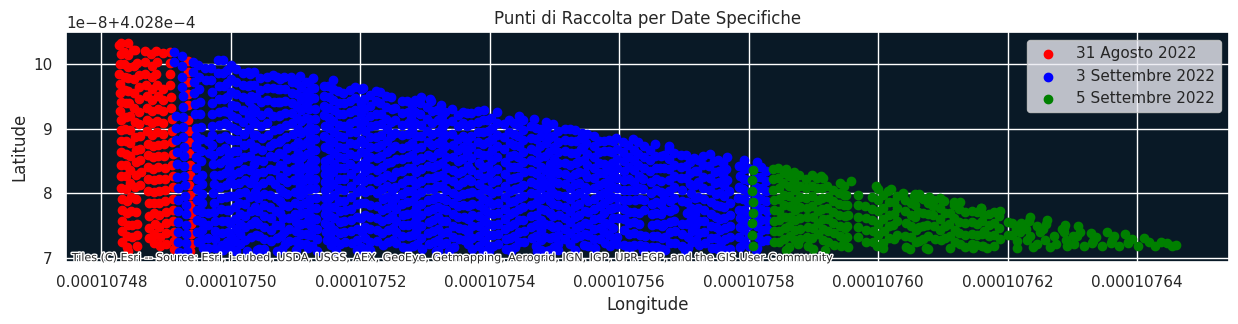

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Assicurati che le colonne delle coordinate siano correttamente formattate come float
df_cl['Latitudine'] = df_cl['Latitudine'].astype(float)
df_cl['Longitudin'] = df_cl['Longitudin'].astype(float)

# Visualizza le prime righe per verificare le coordinate
print(df_cl[['Latitudine', 'Longitudin']].head())

# Converti le coordinate in un oggetto GeoSeries
geometry = gpd.points_from_xy(df_cl['Longitudin'], df_cl['Latitudine'])
df_cl = gpd.GeoDataFrame(df_cl, geometry=geometry)

# Imposta il CRS a EPSG:4326 se non è già definito
if df_cl.crs is None:
    df_cl.set_crs(epsg=4326, inplace=True)
else:
    df_cl = df_cl.to_crs(epsg=4326)

# Filtriamo i dati per le date specifiche
date1 = pd.to_datetime('2022-08-31')
date2 = pd.to_datetime('2022-09-03')
date3 = pd.to_datetime('2022-09-05')

data_31_agosto = df_cl[df_cl['Data'] == date1.date()]
data_3_settembre = df_cl[df_cl['Data'] == date2.date()]
data_5_settembre = df_cl[df_cl['Data'] == date3.date()]

# Creiamo una mappa utilizzando Geopandas
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plottiamo i punti per ogni gruppo di date
data_31_agosto.plot(ax=ax, marker='o', color='red', label='31 Agosto 2022')
data_3_settembre.plot(ax=ax, marker='o', color='blue', label='3 Settembre 2022')
data_5_settembre.plot(ax=ax, marker='o', color='green', label='5 Settembre 2022')

# Aggiungi la mappa di sfondo con un livello di zoom più elevato
ctx.add_basemap(ax, crs=df_cl.crs, source=ctx.providers.Esri.WorldImagery, zoom=12)

# Aggiungiamo una legenda
plt.legend()
plt.title('Punti di Raccolta per Date Specifiche')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


In [ ]:
df_cl.groupby('RESAKG', as_index = False)['AREA'].mean()

RESAKG        AREA
0      50.0  199.500000
1      70.0  168.729000
2     100.0  198.527667
3     180.0  194.542000
4     190.0  143.792000
..      ...         ...
327  4130.0  119.000000
328  4210.0  118.708000
329  4260.0  113.458000
330  4380.0  149.625000
331  4880.0   95.958000

[332 rows x 2 columns]

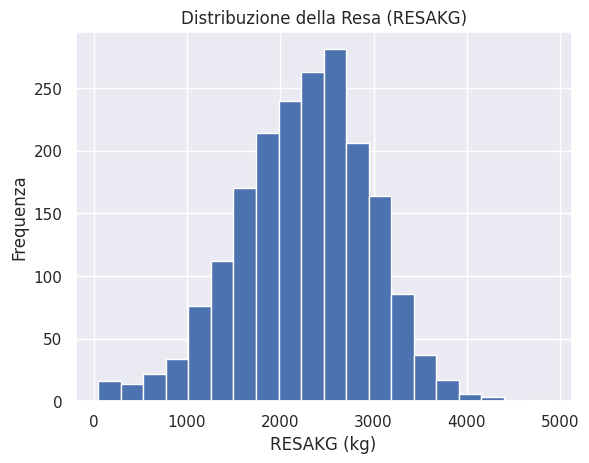

In [ ]:

# Istogramma per la variabile RESAKG
df_cl['RESAKG'].hist(bins=20)
plt.title('Distribuzione della Resa (RESAKG)')
plt.xlabel('RESAKG (kg)')
plt.ylabel('Frequenza')
plt.show()


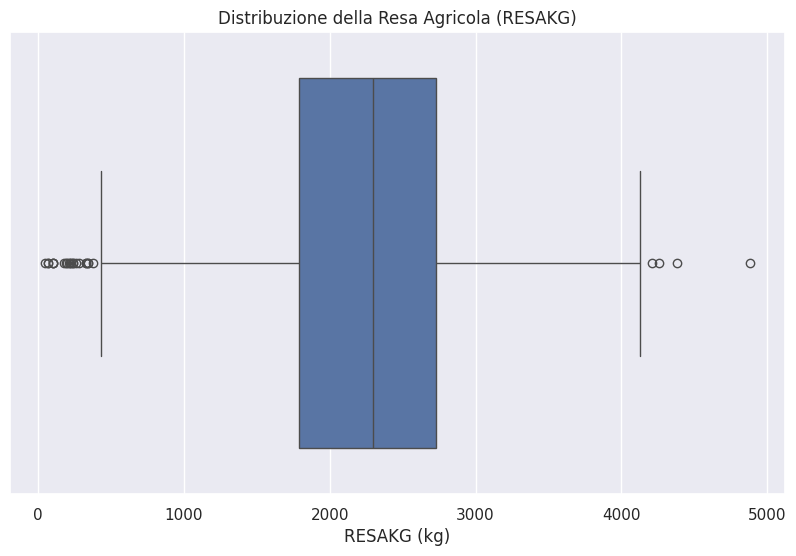

In [ ]:
import seaborn as sns

# Assicurati che la colonna RESAKG sia di tipo numerico
df_cl['RESAKG'] = df_cl['RESAKG'].astype(float)

# Imposta il tema di Seaborn
sns.set_theme()

# Creazione del box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cl, x='RESAKG')
plt.title('Distribuzione della Resa Agricola (RESAKG)')
plt.xlabel('RESAKG (kg)')
plt.show()

In [ ]:
# Calcola i quartili e l'IQR
Q1 = df_cl['RESAKG'].quantile(0.25)
Q3 = df_cl['RESAKG'].quantile(0.75)
IQR = Q3 - Q1

# Definisci i limiti per gli outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifica gli outliers
outliers = df_cl[(df_cl['RESAKG'] < lower_bound) | (df_cl['RESAKG'] > upper_bound)]

# Visualizza gli outliers
print("Outliers:")
print(outliers[['RESAKG']])

# Visualizza i limiti calcolati
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

Outliers:
      RESAKG
122    100.0
123     70.0
124    190.0
125    340.0
138    330.0
141    260.0
158    200.0
171    210.0
173    180.0
178    280.0
179    330.0
211    240.0
277    380.0
311   4380.0
351    100.0
770    100.0
771     50.0
795    220.0
872   4210.0
873   4260.0
945    340.0
946    240.0
947    230.0
1059  4880.0
1644    70.0
Lower bound: 386.25
Upper bound: 4136.25


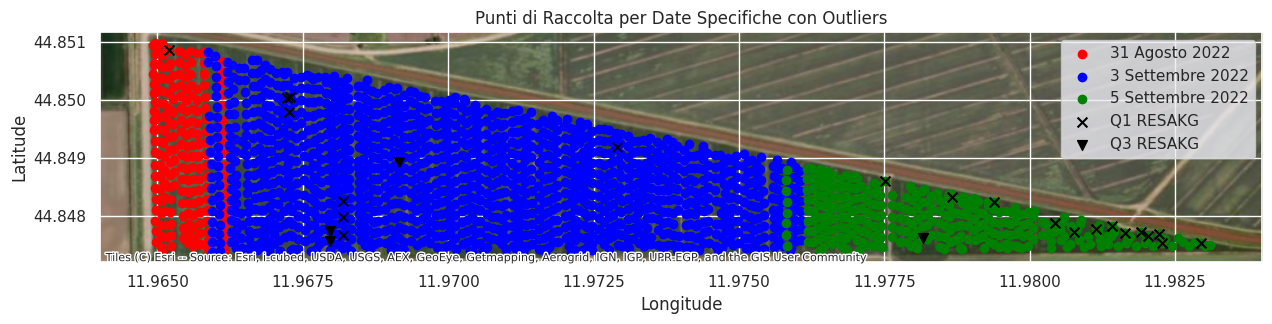

In [ ]:


# Assicurati che le colonne delle coordinate siano correttamente formattate come float
df_cl['Latitudine'] = df_cl['Latitudine'].astype(float)
df_cl['Longitudin'] = df_cl['Longitudin'].astype(float)

# Converti le coordinate in un oggetto GeoSeries
geometry = gpd.points_from_xy(df_cl['Longitudin'], df_cl['Latitudine'])
df_cl = gpd.GeoDataFrame(df_cl, geometry=geometry)

# Imposta il CRS se non è già definito
if df_cl.crs is None:
    df_cl.set_crs(epsg=4326, inplace=True)  # Utilizza EPSG:4326 come CRS predefinito

# Calcola i quartili e l'IQR
Q1 = df_cl['RESAKG'].quantile(0.25)
Q3 = df_cl['RESAKG'].quantile(0.75)
IQR = Q3 - Q1

# Definisci i limiti per gli outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifica gli outliers inferiori e superiori
outliers_lower = df_cl[df_cl['RESAKG'] < lower_bound]
outliers_upper = df_cl[df_cl['RESAKG'] > upper_bound]

# Filtriamo i dati per le date specifiche
date1 = pd.to_datetime('2022-08-31')
date2 = pd.to_datetime('2022-09-03')
date3 = pd.to_datetime('2022-09-05')

data_31_agosto = df_cl[df_cl['Data'] == date1.date()]
data_3_settembre = df_cl[df_cl['Data'] == date2.date()]
data_5_settembre = df_cl[df_cl['Data'] == date3.date()]

# Creiamo una mappa utilizzando Geopandas
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plottiamo i punti per ogni gruppo di date
data_31_agosto.plot(ax=ax, marker='o', color='red', label='31 Agosto 2022')
data_3_settembre.plot(ax=ax, marker='o', color='blue', label='3 Settembre 2022')
data_5_settembre.plot(ax=ax, marker='o', color='green', label='5 Settembre 2022')

# Plottiamo gli outliers inferiori con un triangolo
outliers_lower.plot(ax=ax, marker='x', color='black',  label='Q1 RESAKG', markersize=50)

# Plottiamo gli outliers superiori con una croce
outliers_upper.plot(ax=ax, marker='v', color='black',label='Q3 RESAKG', markersize=50)

# Aggiungiamo la mappa di sfondo
ctx.add_basemap(ax, crs=df_cl.crs.to_string(), source=ctx.providers.Esri.WorldImagery)

# Aggiungiamo una legenda
plt.legend()
plt.title('Punti di Raccolta per Date Specifiche con Outliers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


In [ ]:
# Calcola i quartili e l'IQR
Q1 = df_cl['RESAKG'].quantile(0.25)
Q3 = df_cl['RESAKG'].quantile(0.75)
IQR = Q3 - Q1

# Definisci i limiti per gli outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifica gli outliers
outliers = df_cl[(df_cl['RESAKG'] < lower_bound) | (df_cl['RESAKG'] > upper_bound)]

# Visualizza gli outliers con le informazioni aggiuntive
outliers_info = outliers[['Data', 'Ora', 'VELOCITA', 'AREA', 'RESAKG']]
print("Outliers con informazioni aggiuntive:")
print(outliers_info)

# Visualizza i limiti calcolati
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

Outliers con informazioni aggiuntive:
            Data       Ora  VELOCITA     AREA  RESAKG
122   2022-09-05  11:01:37      6.56  191.333   100.0
123   2022-09-05  11:01:52      4.98  145.250    70.0
124   2022-09-05  11:02:08      4.93  143.792   190.0
125   2022-09-05  11:02:23      5.08  148.167   340.0
138   2022-09-05  11:08:31      5.39  157.208   330.0
141   2022-09-05  11:09:17      5.69  165.958   260.0
158   2022-09-05  11:15:41      5.77  168.292   200.0
171   2022-09-05  11:20:17      7.18  209.417   210.0
173   2022-09-05  11:21:03      6.67  194.542   180.0
178   2022-09-05  11:23:06      7.64  222.833   280.0
179   2022-09-05  11:25:55      5.41  157.792   330.0
211   2022-09-05  11:38:28      6.63  193.375   240.0
277   2022-09-05  12:05:04      6.56  191.333   380.0
311   2022-09-05  12:21:26      5.13  149.625  4380.0
351   2022-08-31  16:45:48      7.03  205.042   100.0
770   2022-09-03  12:54:30      6.83  199.208   100.0
771   2022-09-03  12:54:45      6.84  199.50

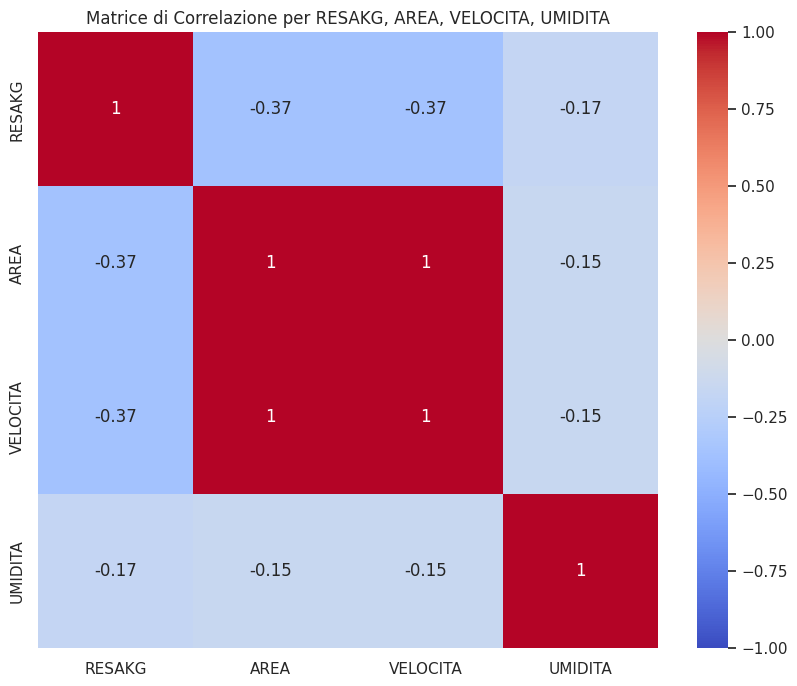

In [ ]:
# Filtra solo le colonne di interesse
columns_of_interest = ['RESAKG', 'AREA', 'VELOCITA', 'UMIDITA']
df_filtered = df_cl[columns_of_interest]

# Calcola la matrice di correlazione solo per le variabili selezionate
corr_matrix = df_filtered.corr()

# Visualizza la matrice di correlazione con una heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice di Correlazione per RESAKG, AREA, VELOCITA, UMIDITA')
plt.show()

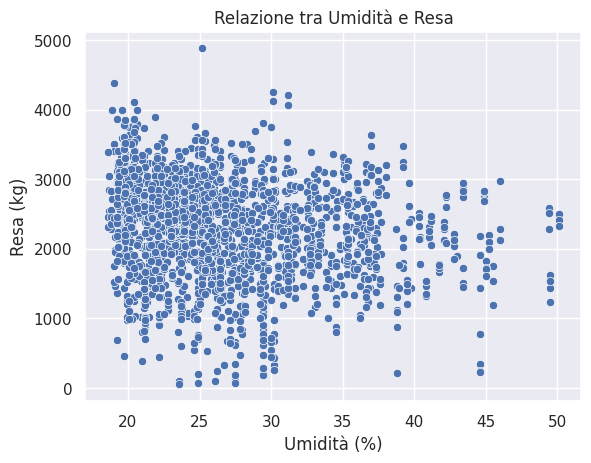

In [ ]:
sns.scatterplot(data=df_cl, x='UMIDITA', y='RESAKG')
plt.title('Relazione tra Umidità e Resa')
plt.xlabel('Umidità (%)')
plt.ylabel('Resa (kg)')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                 RESAKG   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     58.94
Date:                Wed, 03 Jul 2024   Prob (F-statistic):           2.57e-14
Time:                        10:48:10   Log-Likelihood:                -15316.
No. Observations:                1925   AIC:                         3.064e+04
Df Residuals:                    1923   BIC:                         3.065e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2785.3527     70.932     39.268      0.0

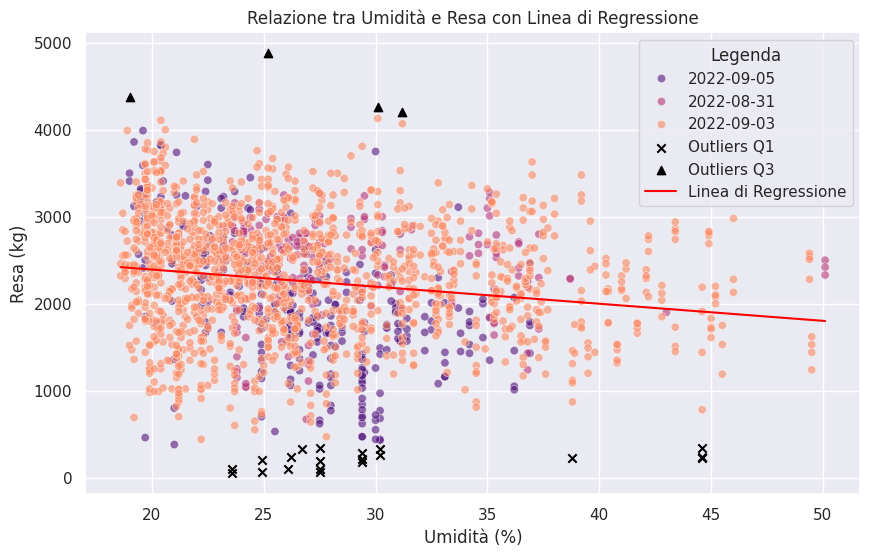

In [ ]:
import seaborn as sns
import statsmodels.api as sm
import numpy as np


# Filtra solo le colonne di interesse e rimuovi i valori mancanti
df_filtered = df_cl[['UMIDITA', 'RESAKG', 'Data']].dropna()

# Verifica che non ci siano valori infiniti solo nelle colonne numeriche
numeric_cols = ['UMIDITA', 'RESAKG']
df_filtered = df_filtered[np.isfinite(df_filtered[numeric_cols]).all(1)]

# Calcola i quartili e l'IQR
Q1 = df_filtered['RESAKG'].quantile(0.25)
Q3 = df_filtered['RESAKG'].quantile(0.75)
IQR = Q3 - Q1

# Definisci i limiti per gli outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifica gli outliers inferiori e superiori
outliers_lower = df_filtered[df_filtered['RESAKG'] < lower_bound]
outliers_upper = df_filtered[df_filtered['RESAKG'] > upper_bound]
non_outliers = df_filtered[(df_filtered['RESAKG'] >= lower_bound) & (df_filtered['RESAKG'] <= upper_bound)]

# Variabili indipendente e dipendente
X = df_filtered['UMIDITA']
y = df_filtered['RESAKG']

# Aggiungi un'intercetta
X = sm.add_constant(X)

# Esegui la regressione
model = sm.OLS(y, X).fit()
print(model.summary())

# Prepara i dati per il plot della linea di regressione
X_pred = np.linspace(X['UMIDITA'].min(), X['UMIDITA'].max(), 100)
X_pred_df = pd.DataFrame({'UMIDITA': X_pred})
X_pred_df = sm.add_constant(X_pred_df)
y_pred = model.predict(X_pred_df)

# Crea il grafico di dispersione con colori diversi per le date
plt.figure(figsize=(10, 6))

# Plotta i dati normali
sns.scatterplot(data=non_outliers, x='UMIDITA', y='RESAKG', hue='Data', palette='magma', alpha=0.6)

# Plotta gli outliers inferiori con una x nera
plt.scatter(outliers_lower['UMIDITA'], outliers_lower['RESAKG'], color='black', marker='x', label='Outliers Q1')

# Plotta gli outliers superiori con un triangolo nero
plt.scatter(outliers_upper['UMIDITA'], outliers_upper['RESAKG'], color='black', marker='^', label='Outliers Q3')

# Plotta la linea di regressione
plt.plot(X_pred, y_pred, label='Linea di Regressione', color='red')

# Aggiungi etichette e titolo
plt.xlabel('Umidità (%)')
plt.ylabel('Resa (kg)')
plt.title('Relazione tra Umidità e Resa con Linea di Regressione')
plt.legend(title='Legenda')
plt.show()


In [ ]:
pip install scipy


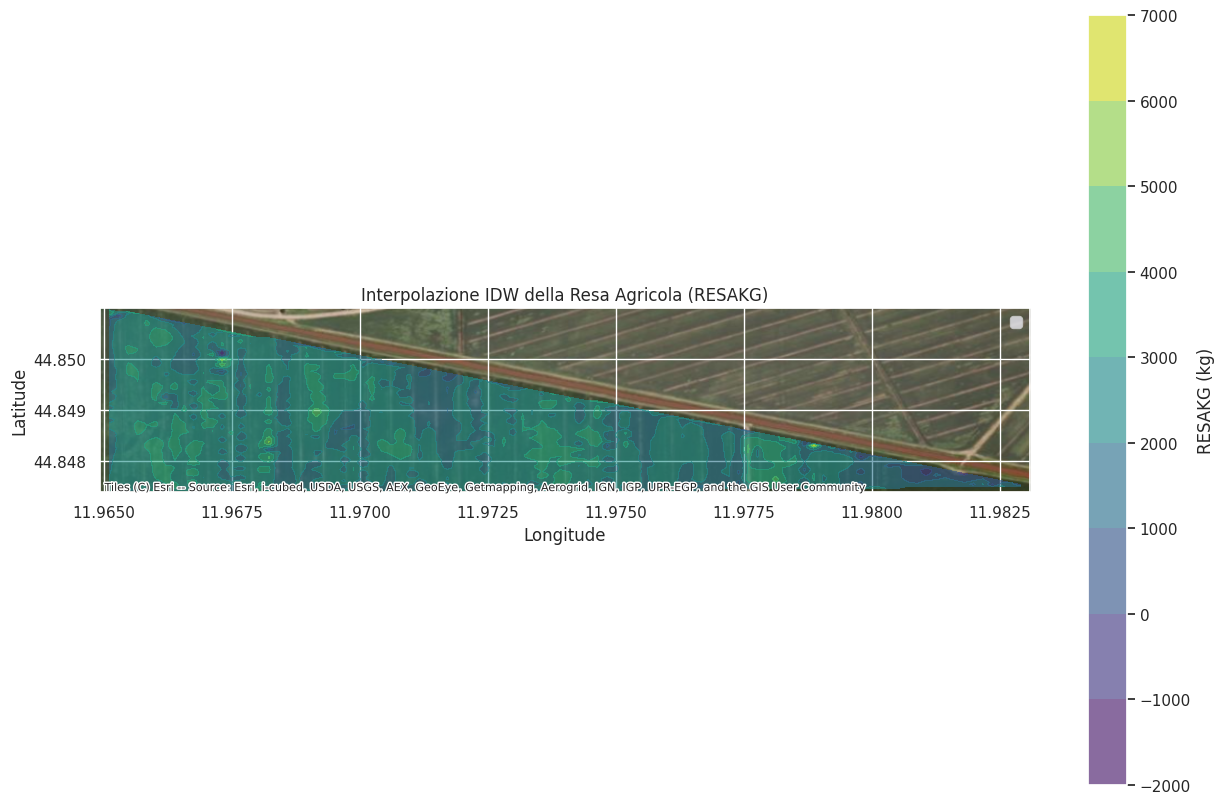

In [ ]:
from scipy.spatial import cKDTree
from scipy.interpolate import griddata

# Funzione per l'interpolazione IDW
def idw_interpolation(x, y, z, resolution=100, power=2):
    grid_x, grid_y = np.meshgrid(
        np.linspace(x.min(), x.max(), resolution),
        np.linspace(y.min(), y.max(), resolution)
    )
    grid_z = griddata(
        np.vstack((x, y)).T,
        z,
        (grid_x, grid_y),
        method='cubic'
    )
    return grid_x, grid_y, grid_z

# Prepara i dati per l'interpolazione
x = df_cl['Longitudin'].values
y = df_cl['Latitudine'].values
z = df_cl['RESAKG'].values

# Esegui l'interpolazione IDW
grid_x, grid_y, grid_z = idw_interpolation(x, y, z)

# Creiamo una mappa utilizzando Geopandas
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plotta l'interpolazione IDW
contour = ax.contourf(grid_x, grid_y, grid_z, cmap='viridis', alpha=0.6)

# Plottiamo i punti di raccolta
# df_cl.plot(ax=ax, marker='o', color='black', markersize=5, label='Punti di Raccolta')

# Aggiungiamo la mappa di sfondo
ctx.add_basemap(ax, crs=df_cl.crs.to_string(), source=ctx.providers.Esri.WorldImagery)

# Aggiungiamo una legenda e una barra dei colori
plt.colorbar(contour, ax=ax, label='RESAKG (kg)')
plt.legend()
plt.title('Interpolazione IDW della Resa Agricola (RESAKG)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


In [ ]:
pip install geemap


# NDVI fenologico


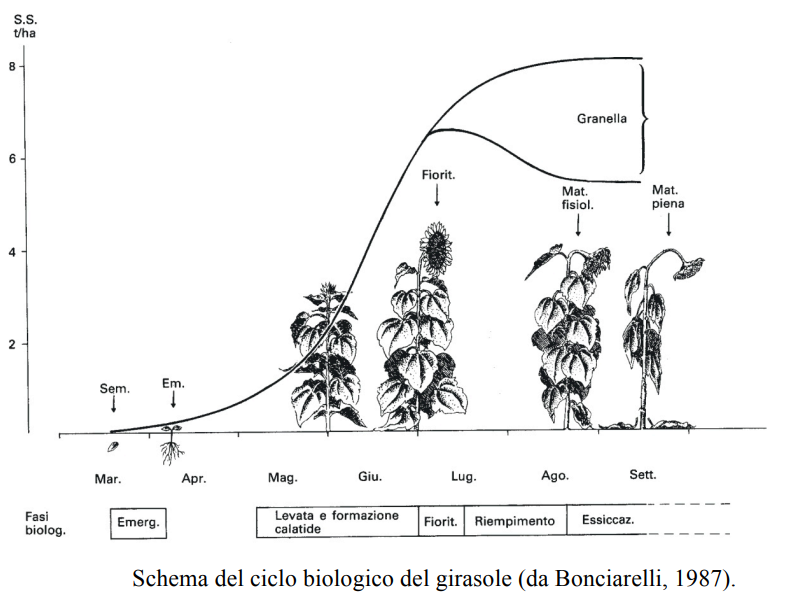

In [ ]:
import ee
import geemap
import geopandas as gpd

# Autenticazione su Google Earth Engine
ee.Authenticate()
# Inizializzazione di Google Earth Engine con il progetto
ee.Initialize(project='ee-esofra24')

# Definisci la funzione per calcolare l'NDVI
def calculate_ndvi(image):
    ndvi = image.normalizedDifference(['SR_B5', 'SR_B4']).rename('NDVI')
    return image.addBands(ndvi)

# Definisci la geometria del campo
field_geometry = ee.Geometry.Polygon(df_cl.geometry.unary_union.convex_hull.exterior.coords[:])

# Definisci i periodi temporali
periods = [
    ('2022-04-01', '2022-05-31'),
    ('2022-05-01', '2022-06-30'),
    ('2022-06-01', '2022-07-31'),
    ('2022-08-01', '2022-09-30')
]

# Inizializza la mappa
Map = geemap.Map()

# Loop attraverso i periodi per calcolare l'NDVI
for start_date, end_date in periods:
    # Carica l'immagine Landsat 8 Collection 2
    landsat = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2') \
        .filterDate(start_date, end_date) \
        .filterBounds(field_geometry) \
        .map(calculate_ndvi)

    # Calcola l'NDVI medio per il campo e ritaglia l'immagine
    ndvi_image = landsat.mean().select('NDVI')
    ndvi_clipped = ndvi_image.clip(field_geometry)

    # Calcola l'NDVI medio per il campo ritagliato
    ndvi_field = ndvi_clipped.reduceRegion(
        reducer=ee.Reducer.mean(),
        geometry=field_geometry,
        scale=30
    )

    # Stampa il valore medio di NDVI per il periodo
    print(f'NDVI medio ({start_date} to {end_date}):', ndvi_field.getInfo())

    # Aggiungi l'NDVI alla mappa
    Map.addLayer(ndvi_clipped, {'min': 0, 'max': 1, 'palette': ['red', 'yellow', 'green']}, f'NDVI {start_date} to {end_date}')

    # Ottieni la geometria del campo come lista di coordinate
    region = field_geometry.getInfo()['coordinates']

    # Esporta l'immagine NDVI su Google Drive
    task = ee.batch.Export.image.toDrive(
        image=ndvi_clipped,
        description=f'NDVI_{start_date}_to_{end_date}',
        folder='EarthEngineImages',
        scale=30,
        region=region,
        fileFormat='GeoTIFF'
    )
    task.start()

# Centra la mappa sull'area di interesse
Map.centerObject(field_geometry, 12)

# Visualizza la mappa
Map


NDVI medio (2022-04-01 to 2022-05-31): {'NDVI': 0.10566350117715408}
NDVI medio (2022-05-01 to 2022-06-30): {'NDVI': 0.1818533457955499}
NDVI medio (2022-06-01 to 2022-07-31): {'NDVI': 0.3096372061084425}
NDVI medio (2022-08-01 to 2022-09-30): {'NDVI': 0.11454098228874408}


Map(center=[44.84863120164886, 11.971099992884453], controls=(WidgetControl(options=['position', 'transparent_…

In [ ]:
import rasterio
import rasterio.features
import rasterio.mask


# Funzione per campionare i valori NDVI
def sample_raster_values(raster_path, df, col_name):
    with rasterio.open(raster_path) as src:
        # Assicurati che le coordinate siano nel sistema di riferimento del raster
        df_ndvi = df_cl.to_crs(src.crs)
        for index, row in df.iterrows():
            coords = [(row['geometry'].x, row['geometry'].y)]
            value = list(src.sample(coords))[0][0]
            df_cl.at[index, col_name] = value
    return df_ndvi


# Carica e campiona i valori dai raster NDVI
ndvi_files = {
    '/content/drive/MyDrive/EarthEngineImages/NDVI_2022-04-01_to_2022-05-31.tif': 'NDVI_Apr_May',
    '/content/drive/MyDrive/EarthEngineImages/NDVI_2022-05-01_to_2022-06-30.tif': 'NDVI_May_Jun',
    '/content/drive/MyDrive/EarthEngineImages/NDVI_2022-06-01_to_2022-07-31.tif': 'NDVI_Jun_Jul',
    '/content/drive/MyDrive/EarthEngineImages/NDVI_2022-08-01_to_2022-09-30.tif': 'NDVI_Aug_Sep'
}

for raster_file, col_name in ndvi_files.items():
    df_ndvi = sample_raster_values(raster_file, df_cl, col_name)

# Verifica il DataFrame aggiornato
df_ndvi


Longitudin  Latitudine  RESAKG  VELOCITA     AREA  UMIDITA  \
0      11.975824   44.847491  1870.0      4.80  140.000      NaN   
1      11.975816   44.847675  1270.0      4.83  140.875      NaN   
2      11.975815   44.847879  1420.0      4.78  139.417      NaN   
3      11.975821   44.848059  2010.0      4.85  141.458     33.1   
4      11.975820   44.848244  1320.0      4.80  140.000     33.1   
...          ...         ...     ...       ...      ...      ...   
1957   11.975743   44.848042  2260.0      4.77  139.125     30.8   
1958   11.975739   44.848240  2460.0      4.78  139.417     24.6   
1959   11.975741   44.848428  2330.0      4.78  139.417     24.6   
1960   11.975741   44.848618  1950.0      4.99  145.542     24.6   
1961   11.975734   44.848830  1810.0      5.44  158.667     24.6   

                       geometry        Data       Ora  NDVI_Apr_May  \
0     POINT (11.97582 44.84749)  2022-09-05  10:08:09      0.098658   
1     POINT (11.97582 44.84768)  2022-09-05  10:08:24      0.096180   
2     POINT (11.97582 44.84788)  2022-09-05  10:08:40      0.096180   
3     POINT (11.97582 44.84806)  2022-09-05  10:08:55      0.098473   
4     POINT (11.97582 44.84824)  2022-09-05  10:09:10      0.097381   
...                         ...         ...       ...           ...   
1957  POINT (11.97574 44.84804)  2022-09-03  20:13:03      0.108951   
1958  POINT (11.97574 44.84824)  2022-09-03  20:13:19      0.100156   
1959  POINT (11.97574 44.84843)  2022-09-03  20:13:34      0.100156   
1960  POINT (11.97574 44.84862)  2022-09-03  20:13:49      0.105335   
1961  POINT (11.97573 44.84883)  2022-09-03  20:14:05      0.111153   

      NDVI_May_Jun  NDVI_Jun_Jul  
0         0.177841      0.302258  
1         0.185928      0.331622  
2         0.185928      0.331622  
3         0.185866      0.335850  
4         0.186226      0.341161  
...            ...           ...  
1957      0.196989      0.351222  
1958      0.177056      0.325647  
1959      0.177056      0.325647  
1960      0.176984      0.327713  
1961      0.170440      0.322380  

[1962 rows x 12 columns]

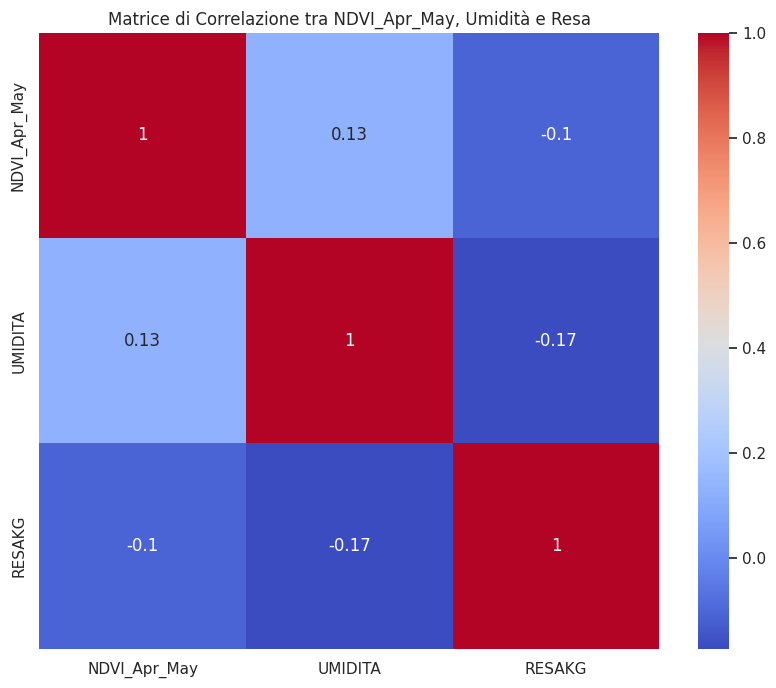

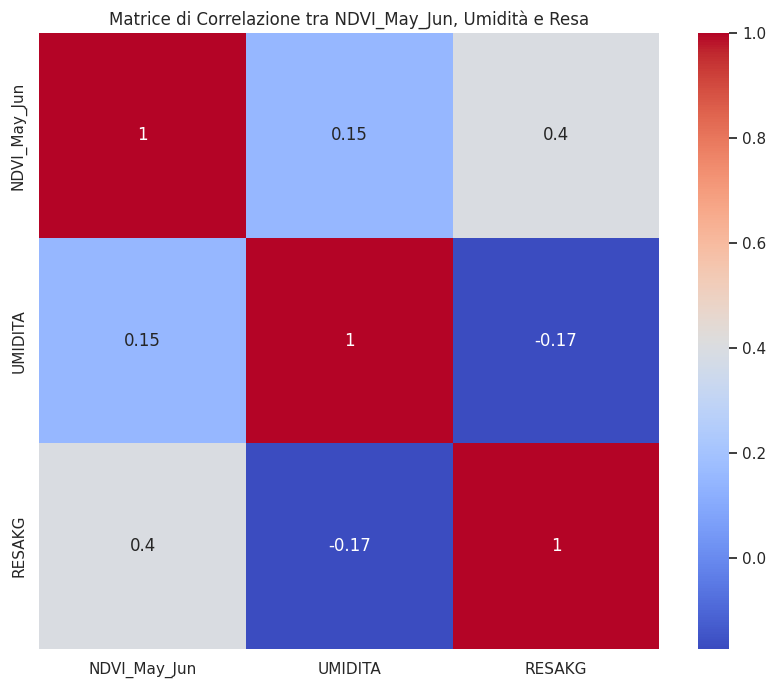

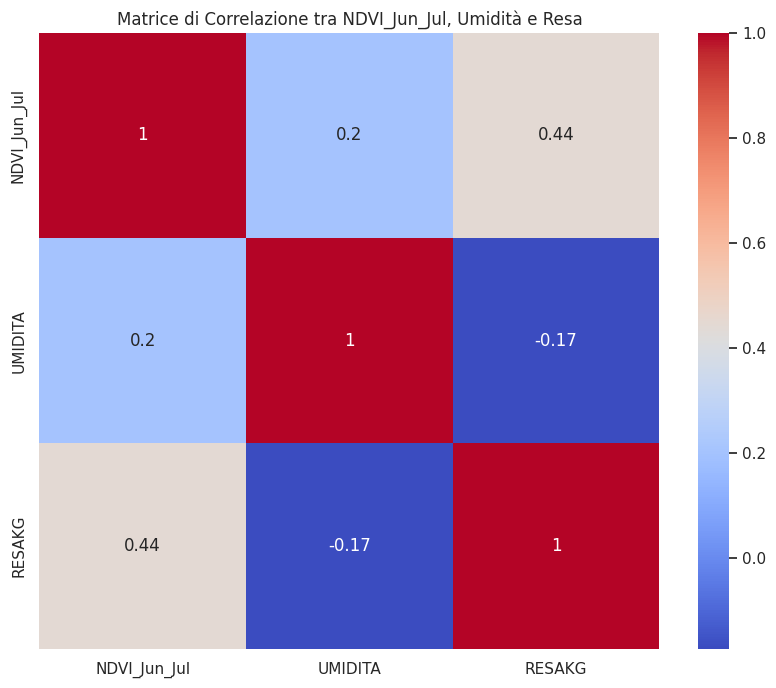

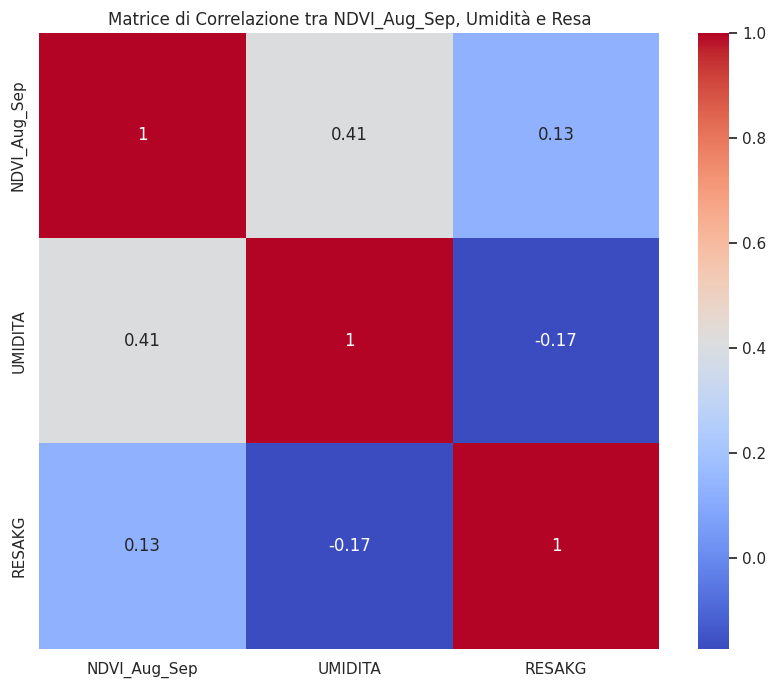

In [ ]:


# Lista dei periodi di NDVI
ndvi_periods = ['NDVI_Apr_May', 'NDVI_May_Jun', 'NDVI_Jun_Jul', 'NDVI_Aug_Sep']

# Loop per generare i plot di correlazione per ogni periodo di NDVI
for period in ndvi_periods:
    # Calcolo della matrice di correlazione per il periodo corrente
    correlation_matrix = df_cl[[period, 'UMIDITA', 'RESAKG']].corr()

    # Visualizzazione della matrice di correlazione
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title(f'Matrice di Correlazione tra {period}, Umidità e Resa')
    plt.show()


In [ ]:
df_cl

Longitudin  Latitudine  RESAKG  VELOCITA     AREA  UMIDITA  \
0      11.975824   44.847491  1870.0      4.80  140.000      NaN   
1      11.975816   44.847675  1270.0      4.83  140.875      NaN   
2      11.975815   44.847879  1420.0      4.78  139.417      NaN   
3      11.975821   44.848059  2010.0      4.85  141.458     33.1   
4      11.975820   44.848244  1320.0      4.80  140.000     33.1   
...          ...         ...     ...       ...      ...      ...   
1957   11.975743   44.848042  2260.0      4.77  139.125     30.8   
1958   11.975739   44.848240  2460.0      4.78  139.417     24.6   
1959   11.975741   44.848428  2330.0      4.78  139.417     24.6   
1960   11.975741   44.848618  1950.0      4.99  145.542     24.6   
1961   11.975734   44.848830  1810.0      5.44  158.667     24.6   

                       geometry        Data       Ora  NDVI_Apr_May  \
0     POINT (11.97582 44.84749)  2022-09-05  10:08:09      0.098658   
1     POINT (11.97582 44.84768)  2022-09-05  10:08:24      0.096180   
2     POINT (11.97582 44.84788)  2022-09-05  10:08:40      0.096180   
3     POINT (11.97582 44.84806)  2022-09-05  10:08:55      0.098473   
4     POINT (11.97582 44.84824)  2022-09-05  10:09:10      0.097381   
...                         ...         ...       ...           ...   
1957  POINT (11.97574 44.84804)  2022-09-03  20:13:03      0.108951   
1958  POINT (11.97574 44.84824)  2022-09-03  20:13:19      0.100156   
1959  POINT (11.97574 44.84843)  2022-09-03  20:13:34      0.100156   
1960  POINT (11.97574 44.84862)  2022-09-03  20:13:49      0.105335   
1961  POINT (11.97573 44.84883)  2022-09-03  20:14:05      0.111153   

      NDVI_May_Jun  NDVI_Jun_Jul  NDVI_Aug_Sep  
0         0.177841      0.302258      0.119930  
1         0.185928      0.331622      0.112964  
2         0.185928      0.331622      0.112964  
3         0.185866      0.335850      0.112838  
4         0.186226      0.341161      0.123112  
...            ...           ...           ...  
1957      0.196989      0.351222      0.147247  
1958      0.177056      0.325647      0.134421  
1959      0.177056      0.325647      0.134421  
1960      0.176984      0.327713      0.137449  
1961      0.170440      0.322380      0.159873  

[1962 rows x 13 columns]

In [ ]:
date_counts = df_cl['Data'].value_counts()
print(date_counts)

Data
2022-09-03    1455
2022-09-05     317
2022-08-31     190
Name: count, dtype: int64


In [ ]:
# Aggiungi una colonna per le rese in Mg (megagrammi o tonnellate)
df_cl['RESAMG'] = df_cl['RESAKG'] / 1000

# Verifica del nuovo DataFrame con la colonna aggiunta
print(df_cl[['Data', 'Ora', 'RESAKG', 'RESAMG', 'VELOCITA']].head(10))

# Calcola la somma totale delle rese in tonnellate per ciascuna fascia temporale
total_resa_per_date = df_cl.groupby('Data')['RESAMG'].sum().reset_index()
total_resa_per_date.columns = ['Data', 'Total_RES_Ton']

# Calcola la media e il valore massimo delle rese in tonnellate per ciascuna fascia temporale
mean_resa_per_date = df_cl.groupby('Data')['RESAMG'].mean().reset_index()
mean_resa_per_date.columns = ['Data', 'Mean_RES_Ton']

max_resa_per_date = df_cl.groupby('Data')['RESAMG'].max().reset_index()
max_resa_per_date.columns = ['Data', 'Max_RES_Ton']

# Unisci i risultati in un unico DataFrame
resa_summary = pd.merge(total_resa_per_date, mean_resa_per_date, on='Data')
resa_summary = pd.merge(resa_summary, max_resa_per_date, on='Data')

# Stampa il riepilogo delle rese in tonnellate
print("Riepilogo delle rese per ciascuna fascia temporale (in tonnellate):")
print(resa_summary)


         Data       Ora  RESAKG  RESAMG  VELOCITA
0  2022-09-05  10:08:09  1870.0    1.87      4.80
1  2022-09-05  10:08:24  1270.0    1.27      4.83
2  2022-09-05  10:08:40  1420.0    1.42      4.78
3  2022-09-05  10:08:55  2010.0    2.01      4.85
4  2022-09-05  10:09:10  1320.0    1.32      4.80
5  2022-09-05  10:09:26  1440.0    1.44      4.90
6  2022-09-05  10:09:41  1160.0    1.16      4.86
7  2022-09-05  10:09:56  1160.0    1.16      4.82
8  2022-09-05  10:10:42  2250.0    2.25      4.49
9  2022-09-05  10:10:58  2380.0    2.38      4.47
Riepilogo delle rese per ciascuna fascia temporale (in tonnellate):
         Data  Total_RES_Ton  Mean_RES_Ton  Max_RES_Ton
0  2022-08-31         457.45      2.407632         3.28
1  2022-09-03        3359.81      2.309148         4.88
2  2022-09-05         607.61      1.916751         4.38


         Data       Ora  RESAKG  RESAMG  VELOCITA  Longitudin  Latitudine
0  2022-09-05  10:08:09  1870.0    1.87      4.80   11.975824   44.847491
1  2022-09-05  10:08:24  1270.0    1.27      4.83   11.975816   44.847675
2  2022-09-05  10:08:40  1420.0    1.42      4.78   11.975815   44.847879
3  2022-09-05  10:08:55  2010.0    2.01      4.85   11.975821   44.848059
4  2022-09-05  10:09:10  1320.0    1.32      4.80   11.975820   44.848244
5  2022-09-05  10:09:26  1440.0    1.44      4.90   11.975808   44.848444
6  2022-09-05  10:09:41  1160.0    1.16      4.86   11.975813   44.848627
7  2022-09-05  10:09:56  1160.0    1.16      4.82   11.975819   44.848805
8  2022-09-05  10:10:42  2250.0    2.25      4.49   11.976175   44.848821
9  2022-09-05  10:10:58  2380.0    2.38      4.47   11.976172   44.848638
          Data  Ora  RESAMG  Productivity
0   2022-08-31   16  172.18        172.18
1   2022-08-31   17  285.27        285.27
2   2022-09-03   10    5.41          5.41
3   2022-09-03   1

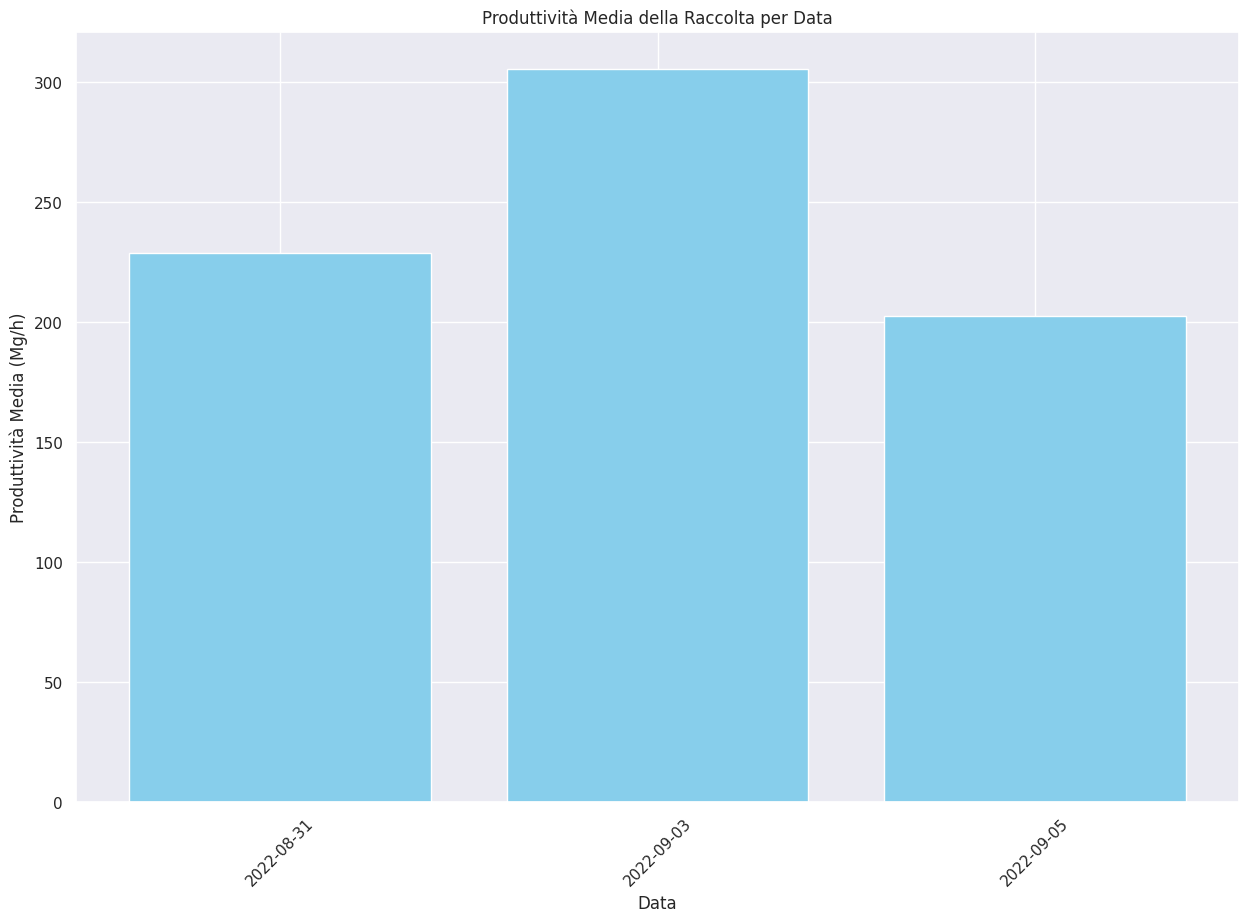

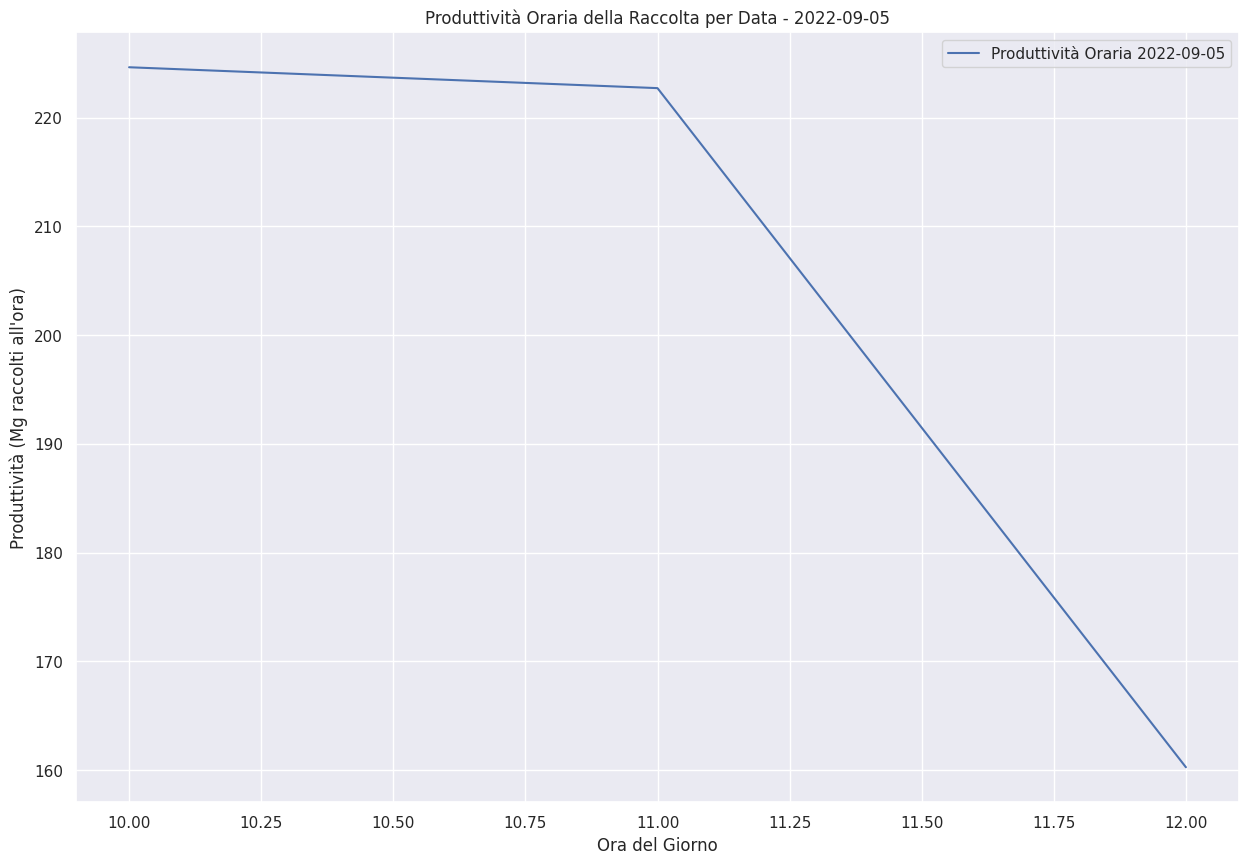

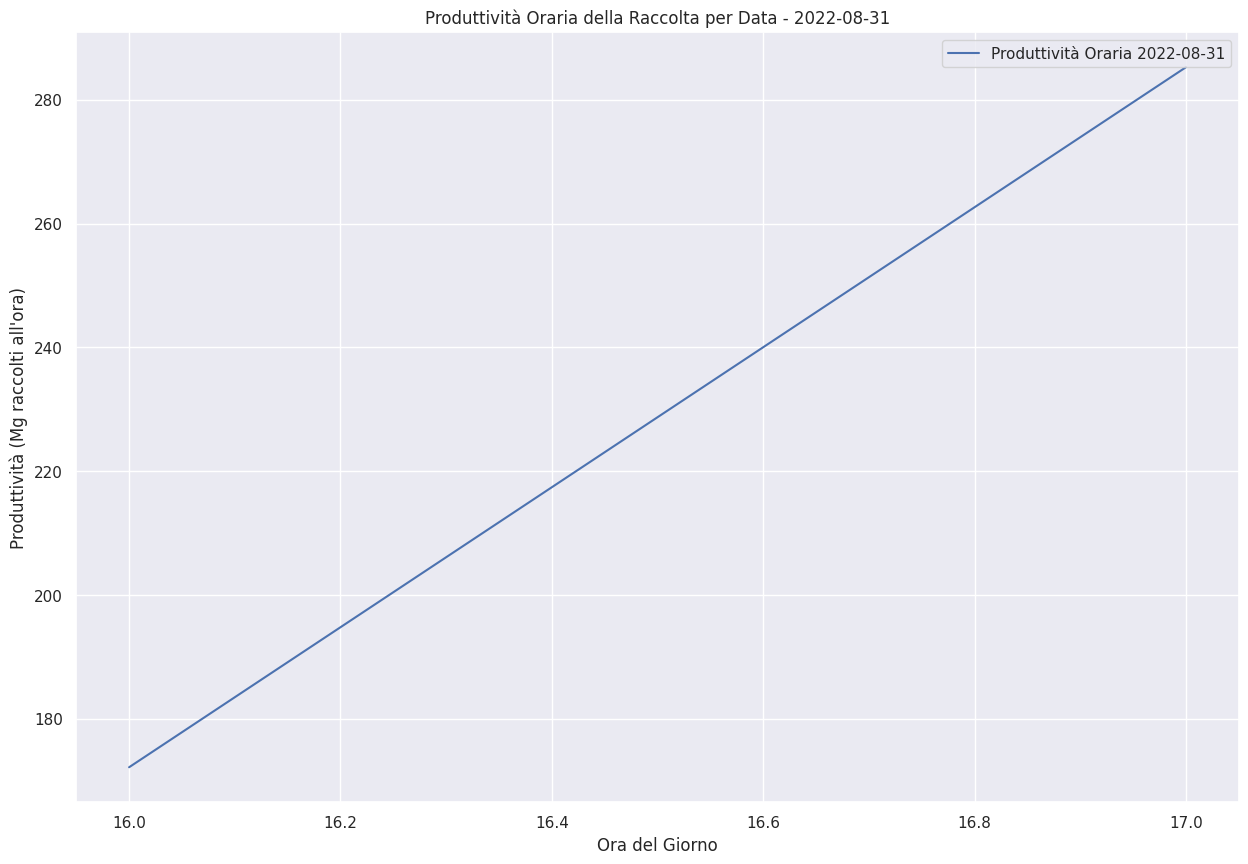

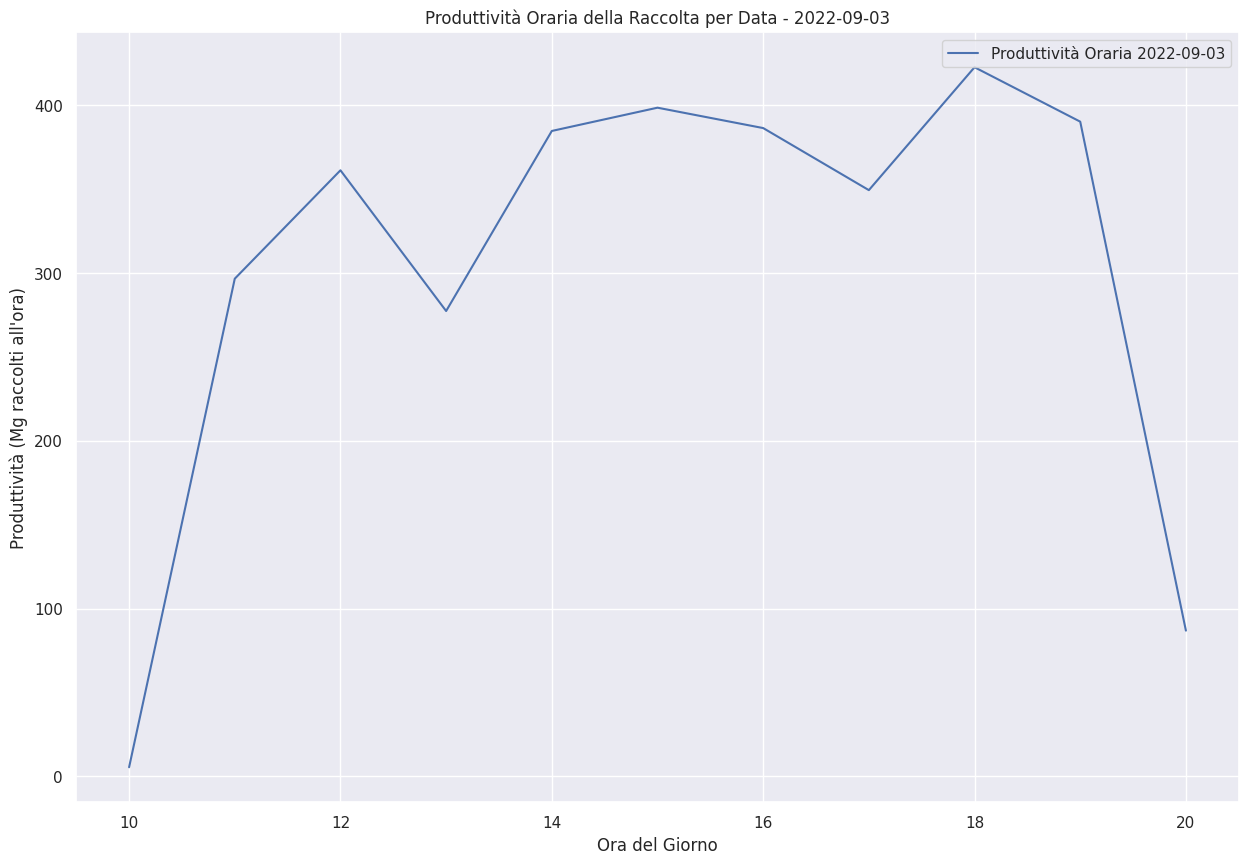

    Ora  Productivity
0    10       115.020
1    11       259.685
2    12       260.775
3    13       277.390
4    14       384.730
5    15       398.600
6    16       279.315
7    17       317.360
8    18       422.710
9    19       390.270
10   20        86.860


In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Carica il dataset dal file GeoPackage
file_path = '/content/drive/MyDrive/data/resa_girasole_2022.gpkg'
df_cl = gpd.read_file(file_path)

# Sostituisci le virgole con punti nelle coordinate
df_cl['Longitudin'] = df_cl['Longitudin'].astype(str).str.replace(',', '.').astype(float)
df_cl['Latitudine'] = df_cl['Latitudine'].astype(str).str.replace(',', '.').astype(float)

# Mappa dei mesi in italiano verso quelli in inglese
months_map = {
    'gen': 'Jan', 'feb': 'Feb', 'mar': 'Mar', 'apr': 'Apr', 'mag': 'May', 'giu': 'Jun',
    'lug': 'Jul', 'ago': 'Aug', 'set': 'Sep', 'ott': 'Oct', 'nov': 'Nov', 'dic': 'Dec'
}

# Funzione per sostituire i mesi in italiano con quelli in inglese
def replace_months(date_str):
    for ita, eng in months_map.items():
        date_str = date_str.replace(ita, eng)
    return date_str

# Creazione di un nuovo DataFrame con le date ripulite
df_cl['Data/Ora'] = df_cl['Data/Ora'].astype(str).apply(replace_months)

# Convertiamo la colonna delle date 'Data/Ora' in formato datetime
df_cl['Data/Ora'] = pd.to_datetime(df_cl['Data/Ora'], format='%d %b %Y, %H:%M:%S', errors='coerce')

# Separiamo la data e l'orario in due diverse colonne
df_cl['Data'] = df_cl['Data/Ora'].dt.date
df_cl['Ora'] = df_cl['Data/Ora'].dt.time

# Rimuoviamo la colonna 'Data/Ora'
df_cl = df_cl.drop(columns=['Data/Ora'])

# Aggiungi una colonna per le rese in tonnellate (megagrammi)
df_cl['RESAMG'] = df_cl['RESAKG'] / 1000

# Verifica del nuovo DataFrame
print(df_cl[['Data', 'Ora', 'RESAKG', 'RESAMG', 'VELOCITA', 'Longitudin', 'Latitudine']].head(10))

# Funzione per calcolare la produttività oraria media e aggiungere la colonna Productivity
def calculate_average_hourly_productivity(df_cl):
    df_cl['Ora'] = pd.to_datetime(df_cl['Ora'].astype(str)).dt.hour
    hourly_productivity = df_cl.groupby(['Data', 'Ora'])['RESAMG'].sum().reset_index()
    hourly_productivity['Productivity'] = hourly_productivity['RESAMG']

    # Merge per aggiungere la colonna Productivity nel DataFrame originale
    df_cl = df_cl.merge(hourly_productivity[['Data', 'Ora', 'Productivity']], on=['Data', 'Ora'], how='left')
    return df_cl, hourly_productivity

# Calcola la produttività oraria media e aggiorna df_cl
df_cl, hourly_productivity = calculate_average_hourly_productivity(df_cl)
print(hourly_productivity)

# Calcola la produttività media per ciascuna data
date_groups = hourly_productivity.groupby('Data')['Productivity'].mean().reset_index()
print(date_groups)

# Visualizza la produttività media per ciascuna data
plt.figure(figsize=(15, 10))
plt.bar(date_groups['Data'].astype(str), date_groups['Productivity'], color='skyblue')
plt.xlabel('Data')
plt.ylabel('Produttività Media (Mg/h)')
plt.title('Produttività Media della Raccolta per Data')
plt.xticks(rotation=45)
plt.show()

# Visualizza i risultati per ciascuna data in grafici separati
dates = df_cl['Data'].unique()
for date in dates:
    daily_productivity = hourly_productivity[hourly_productivity['Data'] == date]
    plt.figure(figsize=(15, 10))
    plt.plot(daily_productivity['Ora'], daily_productivity['Productivity'], label=f'Produttività Oraria {date}')
    plt.xlabel('Ora del Giorno')
    plt.ylabel('Produttività (Mg raccolti all\'ora)')
    plt.title(f'Produttività Oraria della Raccolta per Data - {date}')
    plt.legend()
    plt.show()

# Calcola la produttività media per ogni ora considerando tutte le date
average_hourly_productivity = hourly_productivity.groupby('Ora')['Productivity'].mean().reset_index()
print(average_hourly_productivity)


In [ ]:
df_cl

Longitudin  Latitudine  RESAKG  VELOCITA     AREA  UMIDITA  \
0      11.975824   44.847491  1870.0      4.80  140.000      NaN   
1      11.975816   44.847675  1270.0      4.83  140.875      NaN   
2      11.975815   44.847879  1420.0      4.78  139.417      NaN   
3      11.975821   44.848059  2010.0      4.85  141.458     33.1   
4      11.975820   44.848244  1320.0      4.80  140.000     33.1   
...          ...         ...     ...       ...      ...      ...   
1957   11.975743   44.848042  2260.0      4.77  139.125     30.8   
1958   11.975739   44.848240  2460.0      4.78  139.417     24.6   
1959   11.975741   44.848428  2330.0      4.78  139.417     24.6   
1960   11.975741   44.848618  1950.0      4.99  145.542     24.6   
1961   11.975734   44.848830  1810.0      5.44  158.667     24.6   

                             geometry        Data  Ora  RESAMG  Productivity  
0     POINT (1333142.685 5597543.903)  2022-09-05   10    1.87        224.63  
1     POINT (1333141.706 5597572.841)  2022-09-05   10    1.27        224.63  
2     POINT (1333141.672 5597604.934)  2022-09-05   10    1.42        224.63  
3     POINT (1333142.284 5597633.165)  2022-09-05   10    2.01        224.63  
4     POINT (1333142.195 5597662.213)  2022-09-05   10    1.32        224.63  
...                               ...         ...  ...     ...           ...  
1957  POINT (1333133.624 5597630.480)  2022-09-03   20    2.26         86.86  
1958  POINT (1333133.223 5597661.522)  2022-09-03   20    2.46         86.86  
1959  POINT (1333133.368 5597691.088)  2022-09-03   20    2.33         86.86  
1960  POINT (1333133.435 5597720.889)  2022-09-03   20    1.95         86.86  
1961  POINT (1333132.655 5597754.129)  2022-09-03   20    1.81         86.86  

[1962 rows x 11 columns]

Longitudin      0
Latitudine      0
Productivity    0
dtype: int64
    Longitudin  Latitudine  Productivity
0    11.975824   44.847491        224.63
1    11.975816   44.847675        224.63
2    11.975815   44.847879        224.63
3    11.975821   44.848059        224.63
4    11.975820   44.848244        224.63
5    11.975808   44.848444        224.63
6    11.975813   44.848627        224.63
7    11.975819   44.848805        224.63
8    11.976175   44.848821        224.63
9    11.976172   44.848638        224.63
10   11.976177   44.848456        224.63
11   11.976180   44.848288        224.63
12   11.976183   44.848104        224.63
13   11.976187   44.847923        224.63
14   11.976184   44.847751        224.63
15   11.976191   44.847568        224.63
16   11.976392   44.847427        224.63
17   11.977061   44.847429        224.63
18   11.977455   44.847470        224.63
19   11.977448   44.847652        224.63


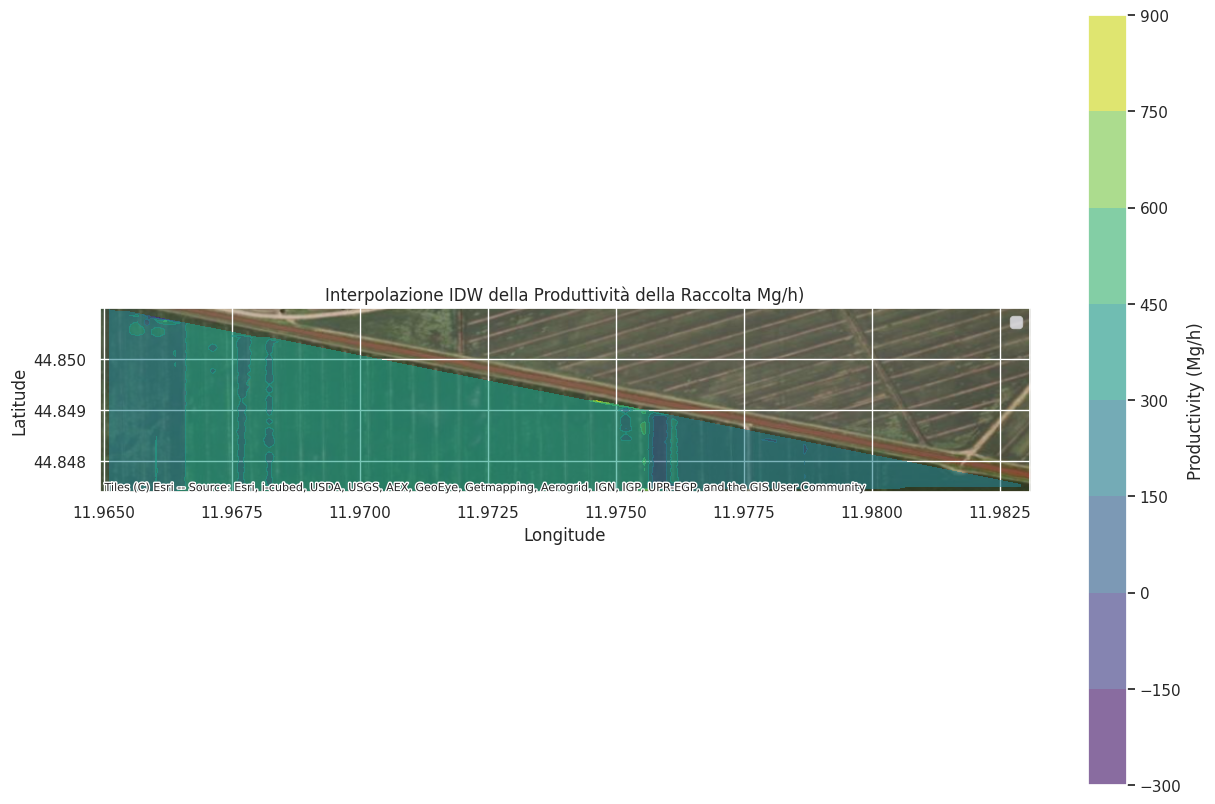

In [ ]:

# Sostituisci le virgole con punti nelle coordinate
df_cl['Longitudin'] = df_cl['Longitudin'].astype(str).str.replace(',', '.').astype(float)
df_cl['Latitudine'] = df_cl['Latitudine'].astype(str).str.replace(',', '.').astype(float)

# Assicurati che tutte le colonne siano nel formato corretto e che i valori non numerici siano gestiti
df_cl['Productivity'] = pd.to_numeric(df_cl['Productivity'], errors='coerce')

# Rimuovi eventuali righe con valori non numerici o NaN
df_cl = df_cl.dropna(subset=['Longitudin', 'Latitudine', 'Productivity'])

# Verifica di nuovo se ci sono dati validi
print(df_cl[['Longitudin', 'Latitudine', 'Productivity']].isna().sum())
print(df_cl[['Longitudin', 'Latitudine', 'Productivity']].head(20))

# Imposta il CRS corretto per il GeoDataFrame
if df_cl.crs != 'EPSG:4326':
    df_cl = df_cl.to_crs(epsg=4326)

# Funzione per l'interpolazione IDW
def idw_interpolation(x, y, z, resolution=100, power=2):
    grid_x, grid_y = np.meshgrid(
        np.linspace(x.min(), x.max(), resolution),
        np.linspace(y.min(), y.max(), resolution)
    )
    grid_z = griddata(
        np.vstack((x, y)).T,
        z,
        (grid_x, grid_y),
        method='cubic'
    )
    return grid_x, grid_y, grid_z

# Prepara i dati per l'interpolazione
x = df_cl['Longitudin'].values
y = df_cl['Latitudine'].values
z = df_cl['Productivity'].values

# Verifica che x, y e z non siano vuoti
if x.size == 0 or y.size == 0 or z.size == 0:
    raise ValueError("Gli array x, y o z sono vuoti dopo la pulizia dei dati.")

# Esegui l'interpolazione IDW
grid_x, grid_y, grid_z = idw_interpolation(x, y, z)

# Creiamo una mappa utilizzando Geopandas
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plotta l'interpolazione IDW
contour = ax.contourf(grid_x, grid_y, grid_z, cmap='viridis', alpha=0.6)

ctx.add_basemap(ax, crs=df_cl.crs.to_string(), source=ctx.providers.Esri.WorldImagery)

# Aggiungiamo una legenda e una barra dei colori
plt.colorbar(contour, ax=ax, label='Productivity (Mg/h)')
plt.legend()
plt.title('Interpolazione IDW della Produttività della Raccolta Mg/h)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


         Data  FuelConsumption_L
0  2022-08-31           2.768776
1  2022-09-03           2.655520
2  2022-09-05           2.204263


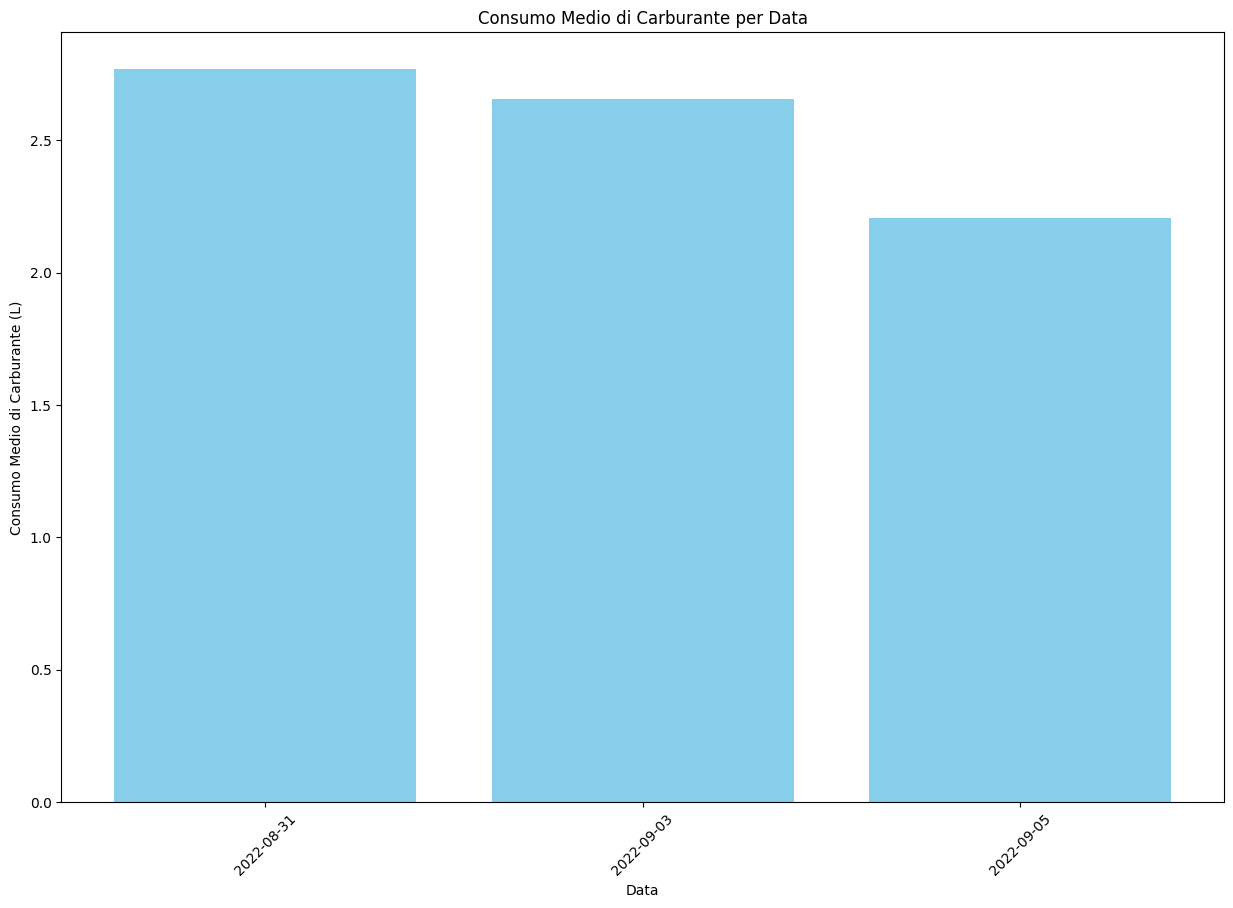

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Carica il dataset dal file GeoPackage
file_path = '/content/drive/MyDrive/data/resa_girasole_2022.gpkg'
df_cl = gpd.read_file(file_path)

# Sostituisci le virgole con punti nelle coordinate
df_cl['Longitudin'] = df_cl['Longitudin'].astype(str).str.replace(',', '.').astype(float)
df_cl['Latitudine'] = df_cl['Latitudine'].astype(str).str.replace(',', '.').astype(float)

# Mappa dei mesi in italiano verso quelli in inglese
months_map = {
    'gen': 'Jan', 'feb': 'Feb', 'mar': 'Mar', 'apr': 'Apr', 'mag': 'May', 'giu': 'Jun',
    'lug': 'Jul', 'ago': 'Aug', 'set': 'Sep', 'ott': 'Oct', 'nov': 'Nov', 'dic': 'Dec'
}

# Funzione per sostituire i mesi in italiano con quelli in inglese
def replace_months(date_str):
    for ita, eng in months_map.items():
        date_str = date_str.replace(ita, eng)
    return date_str

# Creazione di un nuovo DataFrame con le date ripulite
df_cl['Data/Ora'] = df_cl['Data/Ora'].astype(str).apply(replace_months)

# Convertiamo la colonna delle date 'Data/Ora' in formato datetime
df_cl['Data/Ora'] = pd.to_datetime(df_cl['Data/Ora'], format='%d %b %Y, %H:%M:%S', errors='coerce')

# Separiamo la data e l'orario in due diverse colonne
df_cl['Data'] = df_cl['Data/Ora'].dt.date
df_cl['Ora'] = df_cl['Data/Ora'].dt.time

# Rimuoviamo la colonna 'Data/Ora'
df_cl = df_cl.drop(columns=['Data/Ora'])

# Aggiungi una colonna per le rese in tonnellate (megagrammi)
df_cl['RESAMG'] = df_cl['RESAKG'] / 1000

# Calcolo del consumo di carburante medio per ogni fascia temporale (data)
# Supponiamo un consumo medio di 1.15 litri per Mg
consumo_carburante_per_Mg = 1.15
df_cl['FuelConsumption_L'] = df_cl['RESAMG'] * consumo_carburante_per_Mg

# Calcola il consumo medio di carburante per ciascuna data
date_fuel_consumption = df_cl.groupby('Data')['FuelConsumption_L'].mean().reset_index()
print(date_fuel_consumption)

# Visualizza il consumo medio di carburante per ciascuna data
plt.figure(figsize=(15, 10))
plt.bar(date_fuel_consumption['Data'].astype(str), date_fuel_consumption['FuelConsumption_L'], color='skyblue')
plt.xlabel('Data')
plt.ylabel('Consumo Medio di Carburante (L)')
plt.title('Consumo Medio di Carburante per Data')
plt.xticks(rotation=45)
plt.show()


         Data       Ora  OraDecimale  RESAMG  FuelConsumption
0  2022-09-05  10:08:09    10.135833    1.87           2.1505
1  2022-09-05  10:08:24    10.140000    1.27           1.4605
2  2022-09-05  10:08:40    10.144444    1.42           1.6330
3  2022-09-05  10:08:55    10.148611    2.01           2.3115
4  2022-09-05  10:09:10    10.152778    1.32           1.5180
5  2022-09-05  10:09:26    10.157222    1.44           1.6560
6  2022-09-05  10:09:41    10.161389    1.16           1.3340
7  2022-09-05  10:09:56    10.165556    1.16           1.3340
8  2022-09-05  10:10:42    10.178333    2.25           2.5875
9  2022-09-05  10:10:58    10.182778    2.38           2.7370


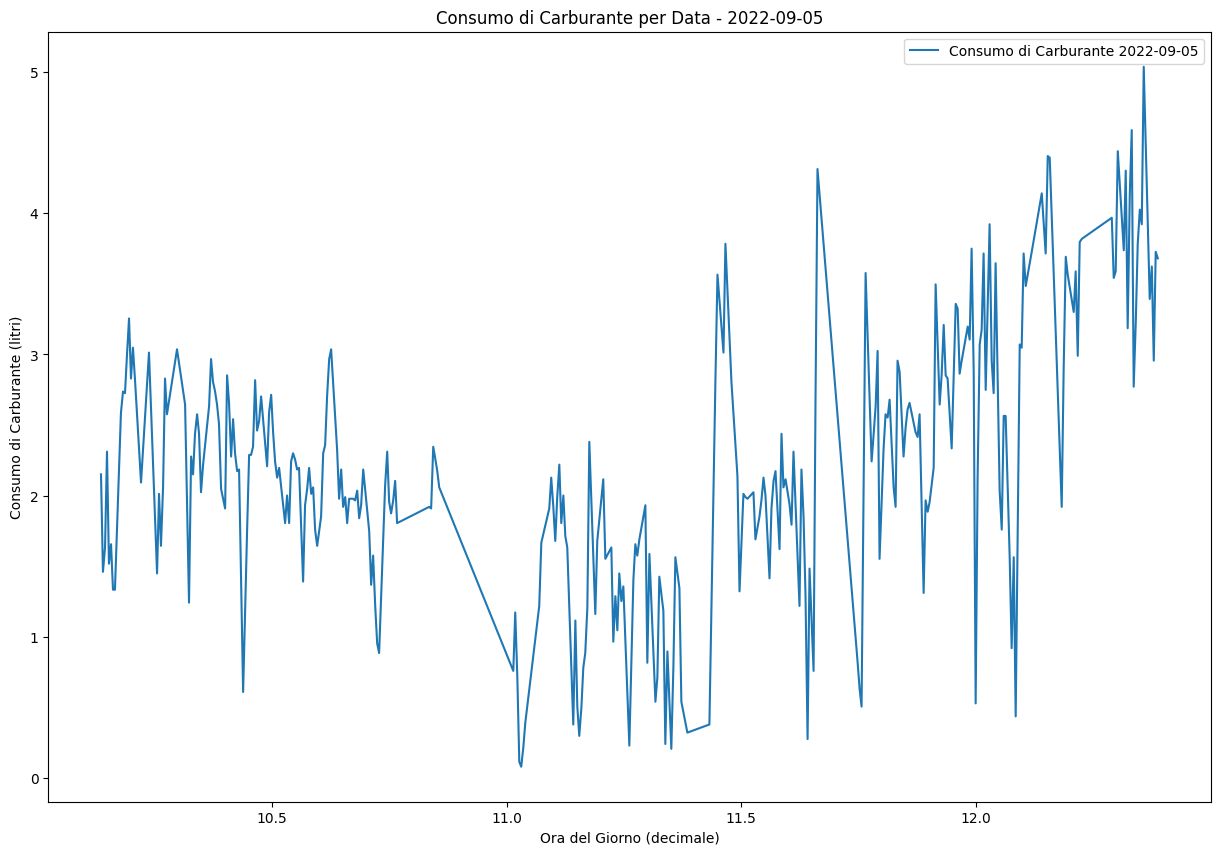

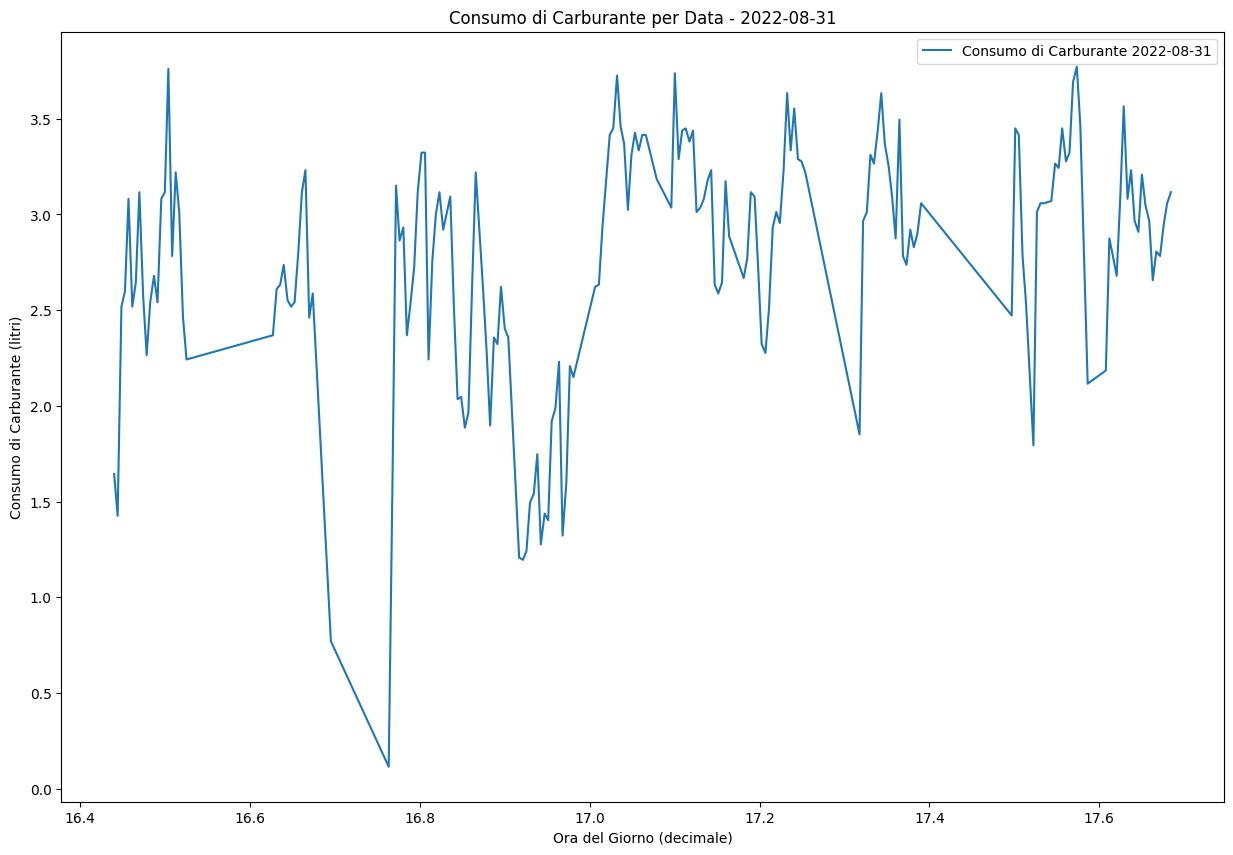

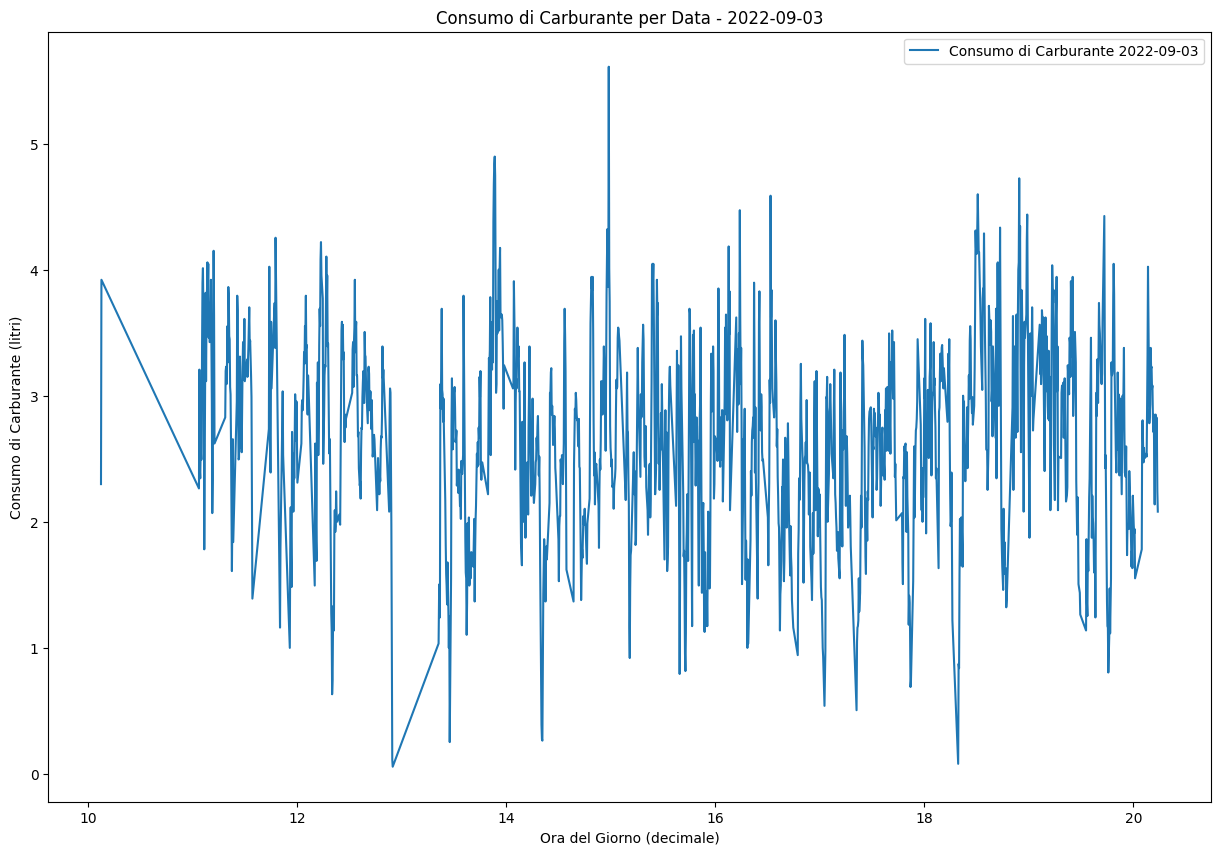

         Data  FuelConsumption
0  2022-08-31         526.0675
1  2022-09-03        3863.7815
2  2022-09-05         698.7515


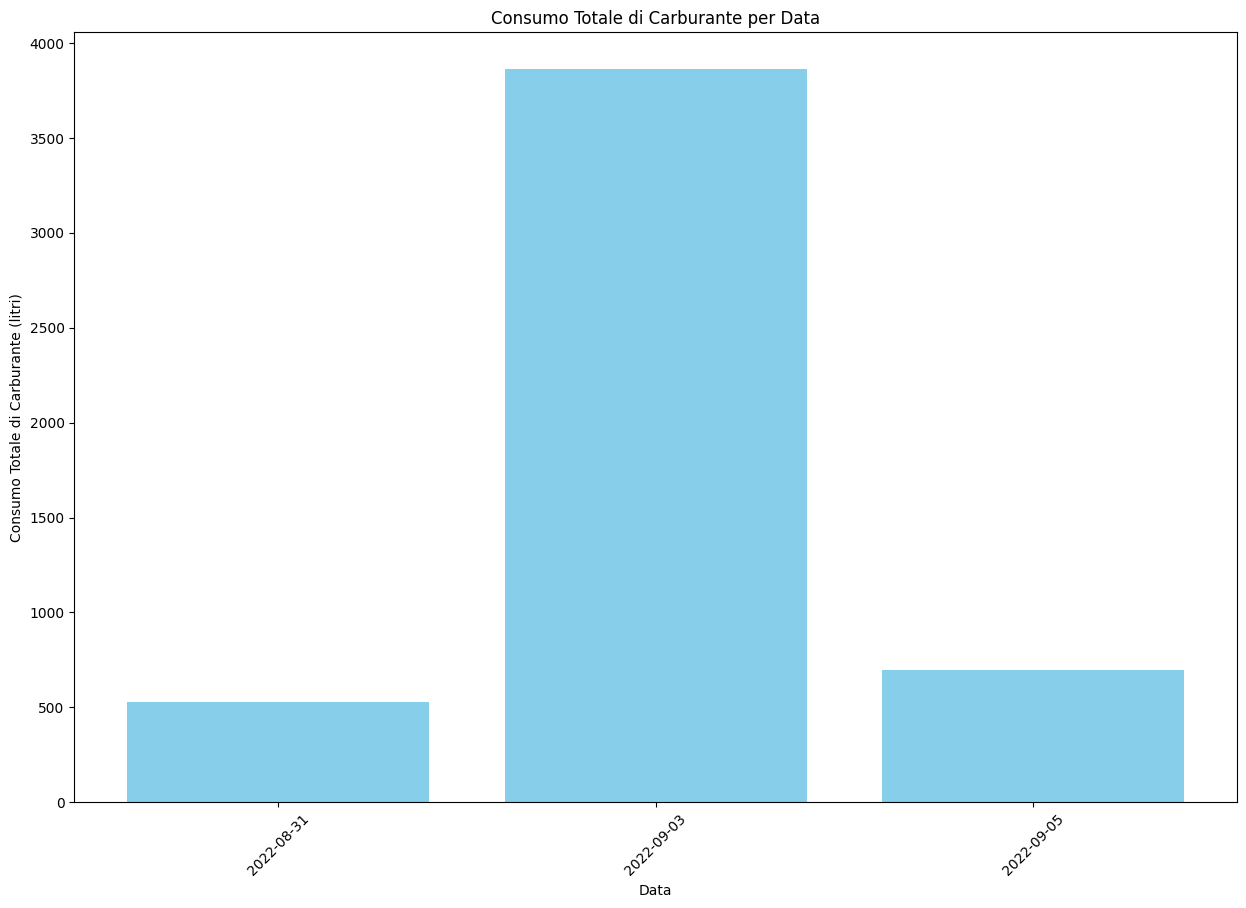

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Carica il dataset dal file GeoPackage
file_path = '/content/drive/MyDrive/data/resa_girasole_2022.gpkg'
df_cl = gpd.read_file(file_path)

# Sostituisci le virgole con punti nelle coordinate
df_cl['Longitudin'] = df_cl['Longitudin'].astype(str).str.replace(',', '.').astype(float)
df_cl['Latitudine'] = df_cl['Latitudine'].astype(str).str.replace(',', '.').astype(float)

# Mappa dei mesi in italiano verso quelli in inglese
months_map = {
    'gen': 'Jan', 'feb': 'Feb', 'mar': 'Mar', 'apr': 'Apr', 'mag': 'May', 'giu': 'Jun',
    'lug': 'Jul', 'ago': 'Aug', 'set': 'Sep', 'ott': 'Oct', 'nov': 'Nov', 'dic': 'Dec'
}

# Funzione per sostituire i mesi in italiano con quelli in inglese
def replace_months(date_str):
    for ita, eng in months_map.items():
        date_str = date_str.replace(ita, eng)
    return date_str

# Creazione di un nuovo DataFrame con le date ripulite
df_cl['Data/Ora'] = df_cl['Data/Ora'].astype(str).apply(replace_months)

# Convertiamo la colonna delle date 'Data/Ora' in formato datetime
df_cl['Data/Ora'] = pd.to_datetime(df_cl['Data/Ora'], format='%d %b %Y, %H:%M:%S', errors='coerce')

# Separiamo la data e l'orario in due diverse colonne
df_cl['Data'] = df_cl['Data/Ora'].dt.date
df_cl['Ora'] = df_cl['Data/Ora'].dt.time

# Rimuoviamo la colonna 'Data/Ora'
df_cl = df_cl.drop(columns=['Data/Ora'])

# Aggiungi una colonna per le rese in tonnellate (megagrammi)
df_cl['RESAMG'] = df_cl['RESAKG'] / 1000

# Calcola il consumo medio di carburante in litri per megagrammo
df_cl['FuelConsumption'] = df_cl['RESAMG'] * 1.15

# Converti l'orario in ore decimali
df_cl['OraDecimale'] = df_cl['Ora'].apply(lambda x: x.hour + x.minute / 60 + x.second / 3600)

# Verifica del nuovo DataFrame
print(df_cl[['Data', 'Ora', 'OraDecimale', 'RESAMG', 'FuelConsumption']].head(10))

# Visualizza i risultati per ciascuna data in grafici separati
dates = df_cl['Data'].unique()
for date in dates:
    daily_consumption = df_cl[df_cl['Data'] == date]
    plt.figure(figsize=(15, 10))
    plt.plot(daily_consumption['OraDecimale'], daily_consumption['FuelConsumption'], label=f'Consumo di Carburante {date}')
    plt.xlabel('Ora del Giorno (decimale)')
    plt.ylabel('Consumo di Carburante (litri)')
    plt.title(f'Consumo di Carburante per Data - {date}')
    plt.legend()
    plt.show()

# Calcola la somma dei consumi di carburante per ciascuna data
date_groups = df_cl.groupby('Data')['FuelConsumption'].sum().reset_index()
print(date_groups)

# Visualizza la somma dei consumi di carburante per ciascuna data
plt.figure(figsize=(15, 10))
plt.bar(date_groups['Data'].astype(str), date_groups['FuelConsumption'], color='skyblue')
plt.xlabel('Data')
plt.ylabel('Consumo Totale di Carburante (litri)')
plt.title('Consumo Totale di Carburante per Data')
plt.xticks(rotation=45)
plt.show()


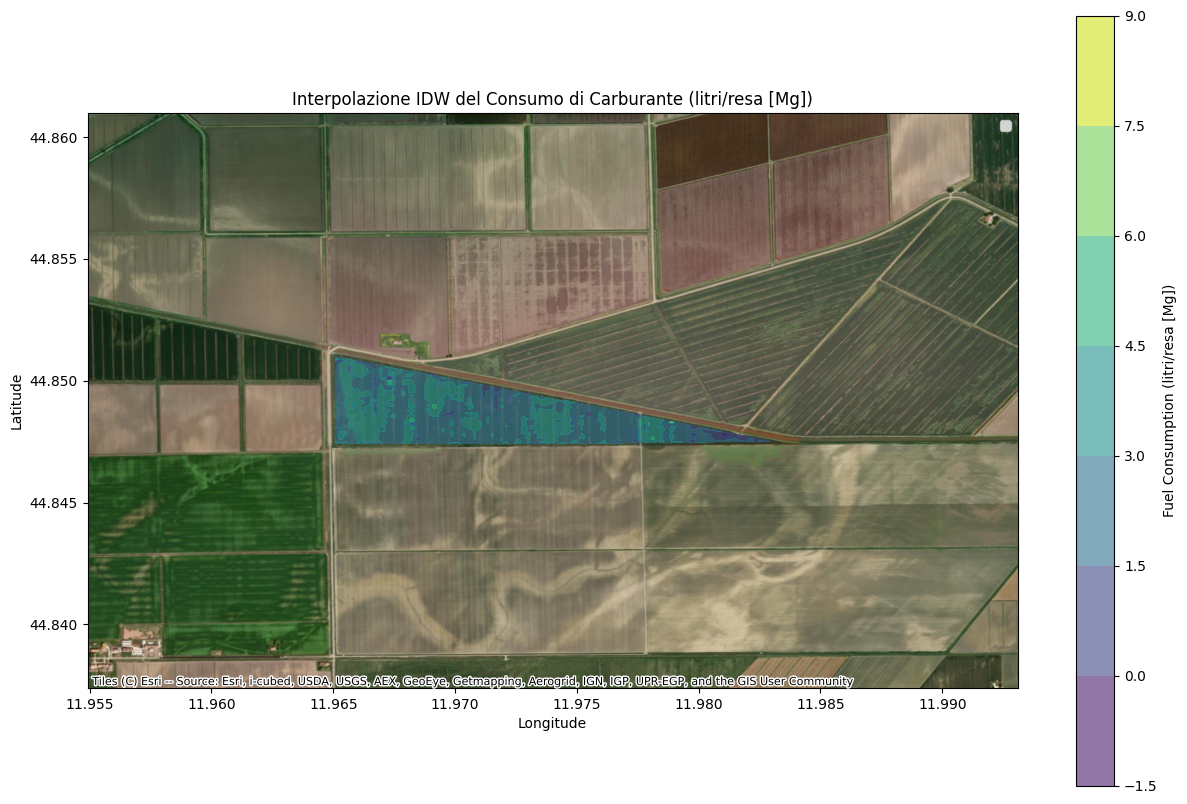

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
import contextily as ctx


# Verifica che il CRS sia corretto
df_cl.set_crs(epsg=4326, inplace=True, allow_override=True)

# Prepara i dati per l'interpolazione
x = df_cl['Longitudin'].values
y = df_cl['Latitudine'].values
z = df_cl['FuelConsumption'].values

# Verifica che x, y e z non siano vuoti
if x.size == 0 or y.size == 0 or z.size == 0:
    raise ValueError("Gli array x, y o z sono vuoti dopo la pulizia dei dati.")

# Funzione per l'interpolazione IDW
def idw_interpolation(x, y, z, resolution=100, power=2):
    grid_x, grid_y = np.meshgrid(
        np.linspace(x.min(), x.max(), resolution),
        np.linspace(y.min(), y.max(), resolution)
    )
    grid_z = griddata(
        np.vstack((x, y)).T,
        z,
        (grid_x, grid_y),
        method='cubic'
    )
    return grid_x, grid_y, grid_z

# Esegui l'interpolazione IDW
grid_x, grid_y, grid_z = idw_interpolation(x, y, z)

# Creiamo una mappa utilizzando Geopandas
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plotta l'interpolazione IDW
contour = ax.contourf(grid_x, grid_y, grid_z, cmap='viridis', alpha=0.6)



# Centra la mappa sulla zona di interesse
ax.set_xlim(df_cl['Longitudin'].min() - 0.01, df_cl['Longitudin'].max() + 0.01)
ax.set_ylim(df_cl['Latitudine'].min() - 0.01, df_cl['Latitudine'].max() + 0.01)

# Aggiungiamo la mappa di sfondo
ctx.add_basemap(ax, crs=df_cl.crs.to_string(), source=ctx.providers.Esri.WorldImagery, zoom=16)

# Aggiungiamo una legenda e una barra dei colori
plt.colorbar(contour, ax=ax, label='Fuel Consumption (litri/resa [Mg])')
plt.legend()
plt.title('Interpolazione IDW del Consumo di Carburante (litri/resa [Mg])')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()